# Load libraries

In [1]:
library(ggplot2) ##plotting package
library(cowplot) ##plots + arrange plots etc
library(RColorBrewer) ## color palettes
library(dplyr) ## for the R pipes
library(tidyr) ## for tidying the dataframes
library(data.table) ## load files into R faster
library(R.utils) ## load .gz files within fread
library(scales)
library(ggsignif)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.0 (2022-06-28 03:20:05 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘pac

# Load data

## Counts

In [2]:
gn_bdr_tpm_updated_df_trunc <- data.table::fread('/Users/rusi2317/projects/DBNascent_Analysis/data/final_counts/genes_5ptrunc_bidirectionals_tpm500bp_promoters_samples.tsv.gz')
dim(gn_bdr_tpm_updated_df_trunc)
head(gn_bdr_tpm_updated_df_trunc)


[1] 284441    886

Geneid Chr   Start     End       Length Bidirid SRZ1950491 SRZ1950493
1 ZZZ3   chr1   77562416  77681908 119493 Gene    5.82945457 8.3145779 
2 ZZEF1  chr17   4004445   4142280 137836 Gene    2.96570797 3.6729336 
3 ZYX    chr7  143382095 143391111   9017 Gene    1.32486628 0.9145094 
4 ZYG11B chr1   52727203  52827336 100134 Gene    2.26242489 2.5953030 
5 ZYG11A chr1   52843510  52894995  51486 Gene    0.02531241 0.0000000 
6 ZXDC   chr3  126458901 126475169  16269 Gene    4.43249906 5.1300536 
  SRZ1950495  SRZ1950497  ⋯ SRR9833433 SRZ9833428 SRZ9833431 SRZ9833434
1 5.980257048 6.282368367 ⋯ 1.6417523   9.745789  1.2758497  1.6259456 
2 3.443278075 3.309437669 ⋯ 0.9983549   3.823799  0.7106638  1.0820423 
3 0.362819651 0.495713321 ⋯ 4.9466981  26.342880  4.4171130  9.8214777 
4 1.638250776 1.865425871 ⋯ 2.8256766   2.822962  1.9965896  0.6858245 
5 0.009077488 0.009138605 ⋯ 0.4818851   1.212344  0.2091079  0.2506957 
6 4.639449997 4.063352682 ⋯ 2.4333443   8.113454  2.0195602  3.2076399 
  SRR11793825 SRR11793826 SRR11793827 SRR11793828 SRR11793829 SRR11793830
1  5.560293    5.854207   5.407800    5.643423    0.5279793   4.530625   
2  4.377654    4.293882   3.599961    3.442803    0.4787957   2.945369   
3 15.413663   14.442057   7.510637    8.475799    1.3579248   6.731350   
4  3.881858    3.851474   3.262415    3.245017    0.4362710   2.877564   
5  6.035404    6.161138   5.291013    5.292451    0.8061700   4.896948   
6  5.764744    4.412697   3.455598    3.546275    0.4400926   3.607818

### Chr20 Genes and Chr22 Bidirectionals

In [3]:
#get chr20 genes and chr22 bidirectionals
gn_bdr_tpm_chr20_genes <- subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr20' & Bidirid =='Gene')
gn_bdr_tpm_chr22_bidirs <- subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr22' & Bidirid !='Gene')

#combine the two data.tables and impose the same chomosome ID on all transcripts 
#using the gene chromosome id since the bidirectional transcript names contain chrID
gn_bdr_tpm_chr20_genes_chr22_bidirs <- rbind(gn_bdr_tpm_chr20_genes,
                                             gn_bdr_tpm_chr22_bidirs)
gn_bdr_tpm_chr20_genes_chr22_bidirs$Chr <- 'chr20'

##verify the trancript counts
dim(gn_bdr_tpm_chr20_genes)
dim(gn_bdr_tpm_chr22_bidirs)
dim(gn_bdr_tpm_chr20_genes_chr22_bidirs)

head(gn_bdr_tpm_chr20_genes_chr22_bidirs, 3)
tail(gn_bdr_tpm_chr20_genes_chr22_bidirs, 3)

[1] 773 886

[1] 3878  886

[1] 4651  886

Geneid Chr   Start    End      Length Bidirid SRZ1950491 SRZ1950493
1 ZSWIM3 chr20 45858331 45879130 20800  Gene    3.080563   2.354664  
2 ZSWIM1 chr20 45881977 45885266  3290  Gene    5.809760   5.544511  
3 ZNFX1  chr20 49245901 49277307 31407  Gene    6.984999   7.208386  
  SRZ1950495 SRZ1950497 ⋯ SRR9833433 SRZ9833428 SRZ9833431 SRZ9833434
1 2.583981   2.103724   ⋯ 0.3193849  1.103823   0.1743221  0.4216137 
2 5.540176   5.577477   ⋯ 0.9065846  2.862400   0.6103922  2.2713247 
3 4.821402   4.434394   ⋯ 2.8749437  6.678411   1.7601495  2.4776151 
  SRR11793825 SRR11793826 SRR11793827 SRR11793828 SRR11793829 SRR11793830
1  5.378172    4.414646    4.017738    4.022562   0.4839096   2.875349   
2 21.637519   18.522239    9.104738   10.248473   1.7346928   9.528506   
3 12.448369   13.927442   10.173388   10.846989   1.2422734   9.224005

Geneid                       Chr   Start    End      Length Bidirid
1 chr22-50800753-50801331-dreg chr20 50800753 50801331 578    dREG   
2 chr22-50803585-50804249-dreg chr20 50803585 50804249 664    dREG   
3 chr22-50806471-50806859-dreg chr20 50806471 50806859 388    dREG   
  SRZ1950491 SRZ1950493 SRZ1950495 SRZ1950497 ⋯ SRR9833433 SRZ9833428
1 0          0.0000000  0          0.4070158  ⋯ 0          0.0000000 
2 0          0.3763295  0          0.0000000  ⋯ 0          0.1172122 
3 0          0.0000000  0          0.0000000  ⋯ 0          0.2005899 
  SRZ9833431 SRZ9833434 SRR11793825 SRR11793826 SRR11793827 SRR11793828
1 0.193021   0          9.774735    1.444238    3.379862    3.888982   
2 0.000000   0          0.000000    0.000000    0.000000    0.000000   
3 0.000000   0          0.000000    0.000000    0.000000    0.000000   
  SRR11793829 SRR11793830
1 0.8976312   6.923828   
2 0.0000000   0.000000   
3 0.0000000   0.000000

In [4]:
nrow(subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr20'))

[1] 7169

### Chr22 Genes and Chr20 Bidirectionals

In [5]:
#get chr22 genes and chr21 bidirectionals
gn_bdr_tpm_chr22_genes <- subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr22' & Bidirid =='Gene')
gn_bdr_tpm_chr20_bidirs <- subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr20' & Bidirid !='Gene')

#combine the two data.tables and impose the same chomosome ID on all transcripts 
#using the gene chromosome id since the bidirectional transcript names contain chrID
gn_bdr_tpm_chr22_genes_chr20_bidirs <- rbind(gn_bdr_tpm_chr22_genes, 
                                             gn_bdr_tpm_chr20_bidirs)
gn_bdr_tpm_chr22_genes_chr20_bidirs$Chr <- 'chr22'

##verify the trancript counts
dim(gn_bdr_tpm_chr22_genes)
dim(gn_bdr_tpm_chr20_bidirs)
dim(gn_bdr_tpm_chr22_genes_chr20_bidirs)

head(gn_bdr_tpm_chr22_genes_chr20_bidirs, 3)
tail(gn_bdr_tpm_chr22_genes_chr20_bidirs, 3)

[1] 641 886

[1] 6396  886

[1] 7037  886

Geneid    Chr   Start    End      Length Bidirid SRZ1950491 SRZ1950493
1 ZNRF3-AS1 chr22 29024999 29030726   5728 Gene    0.03792001 0.000000  
2 ZNRF3     chr22 28918139 29057488 139350 Gene    1.05992068 1.020332  
3 ZNF74     chr22 20394865 20408463  13599 Gene    4.32846335 4.722396  
  SRZ1950495 SRZ1950497 ⋯ SRR9833433 SRZ9833428 SRZ9833431 SRZ9833434
1 0.0000000  0.0000000  ⋯ 0.2366893  0.6657848  0.3116372  0.5283027 
2 0.6607149  0.6499693  ⋯ 0.5915319  2.9930749  0.4979844  0.5322624 
3 2.9212369  3.0620012  ⋯ 0.5184155  0.8184080  0.3404658  0.7947322 
  SRR11793825 SRR11793826 SRR11793827 SRR11793828 SRR11793829 SRR11793830
1  0.1972694  0.000000    0.5684241   0.5668415   0.0000000   0.1164447  
2  1.4271463  1.431718    1.0654508   1.2098125   0.2010539   1.1168443  
3 10.8018761  9.453231    6.5921538   6.5199258   1.2590204   4.6431525

Geneid                       Chr   Start    End      Length Bidirid
1 chr20-64304117-64304703-dreg chr22 64304117 64304703 586    dREG   
2 chr20-64306251-64306489-dreg chr22 64306251 64306489 238    dREG   
3 chr20-64308011-64308289-dreg chr22 64308011 64308289 278    dREG   
  SRZ1950491 SRZ1950493 SRZ1950495 SRZ1950497 ⋯ SRR9833433 SRZ9833428
1 0          0          0          0          ⋯ 0          0         
2 0          0          0          0          ⋯ 0          0         
3 0          0          0          0          ⋯ 0          0         
  SRZ9833431 SRZ9833434 SRR11793825 SRR11793826 SRR11793827 SRR11793828
1 0          0          0           1.424521    0.7408267   0.85242    
2 0          0          0           0.000000    0.0000000   0.00000    
3 0          0          0           0.000000    0.0000000   0.00000    
  SRR11793829 SRR11793830
1 0           0          
2 0           0          
3 0           0

In [6]:
nrow(subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr22'))

[1] 4519

### Combine the swapped chromosomes

In [7]:
##combine the swapped bidirectectionals and genes to one data.table
swapped_chr20_chr22 <- rbind(gn_bdr_tpm_chr22_genes_chr20_bidirs,
                            gn_bdr_tpm_chr20_genes_chr22_bidirs)
dim(swapped_chr20_chr22)
head(swapped_chr20_chr22)

[1] 11688   886

Geneid    Chr   Start    End      Length Bidirid SRZ1950491  SRZ1950493
1 ZNRF3-AS1 chr22 29024999 29030726   5728 Gene     0.03792001  0.000000 
2 ZNRF3     chr22 28918139 29057488 139350 Gene     1.05992068  1.020332 
3 ZNF74     chr22 20394865 20408463  13599 Gene     4.32846335  4.722396 
4 ZNF70     chr22 23738682 23750362  11681 Gene    11.30563558 11.444849 
5 ZNF280B   chr22 22484426 22507992  23567 Gene     2.28569778  2.831022 
6 ZNF280A   chr22 22513736 22519520   5785 Gene     0.00000000  0.000000 
  SRZ1950495 SRZ1950497 ⋯ SRR9833433 SRZ9833428 SRZ9833431 SRZ9833434
1 0.0000000   0.0000000 ⋯ 0.2366893  0.6657848  0.3116372  0.5283027 
2 0.6607149   0.6499693 ⋯ 0.5915319  2.9930749  0.4979844  0.5322624 
3 2.9212369   3.0620012 ⋯ 0.5184155  0.8184080  0.3404658  0.7947322 
4 7.1418879  10.4526496 ⋯ 0.3365887  1.3458980  0.2340014  0.8829298 
5 1.7748987   1.8267783 ⋯ 0.4314580  2.5726100  0.4284268  0.7913933 
6 0.0000000   0.0000000 ⋯ 0.3749714  1.7893244  0.2024969  0.2668864 
  SRR11793825 SRR11793826 SRR11793827 SRR11793828 SRR11793829 SRR11793830
1   0.1972694   0.000000    0.5684241   0.5668415  0.0000000    0.1164447
2   1.4271463   1.431718    1.0654508   1.2098125  0.2010539    1.1168443
3  10.8018761   9.453231    6.5921538   6.5199258  1.2590204    4.6431525
4   8.3191938   8.432736    5.0544410   5.8585726  0.6484831    5.6339536
5  32.0763268  34.393902   29.4825896  30.3097955  2.3027839   25.0850871
6 116.6094593 118.902332  134.1020572 148.2580221 19.7308192  121.3697175

### Save the counts table

In [8]:
data.table::fwrite(swapped_chr20_chr22,
           '/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/final_counts/genes_5ptrunc_bidirectionals_tpm_swapped_chr20_chr22.tsv',
           sep='\t')

In [9]:
subset(gn_bdr_tpm_updated_df_trunc, Chr =='chr20')


Geneid                       Chr   Start    End      Length Bidirid
1    ZSWIM3                       chr20 45858331 45879130  20800 Gene   
2    ZSWIM1                       chr20 45881977 45885266   3290 Gene   
3    ZNFX1                        chr20 49245901 49277307  31407 Gene   
4    ZNF831                       chr20 59191770 59259112  67343 Gene   
5    ZNF663P                      chr20 46456493 46456893    401 Gene   
6    ZNF512B                      chr20 63956704 63969180  12477 Gene   
7    ZNF343                       chr20  2491836  2508165  16330 Gene   
8    ZNF341-AS1                   chr20 33787373 33810349  22977 Gene   
9    ZNF341                       chr20 33732746 33792269  59524 Gene   
10   ZNF337-AS1                   chr20 25624975 25670344  45370 Gene   
11   ZNF337                       chr20 25673195 25686189  12995 Gene   
12   ZNF335                       chr20 45948660 45971453  22794 Gene   
13   ZNF334                       chr20 46499630 46512822  13193 Gene   
14   ZNF217                       chr20 53567071 53582347  15277 Gene   
15   ZNF133                       chr20 18289277 18316996  27720 Gene   
16   ZMYND8                       chr20 47298126 47356139  58014 Gene   
17   ZHX3                         chr20 41178455 41299370 120916 Gene   
18   ZGPAT                        chr20 63708778 63736142  27365 Gene   
19   ZFP64                        chr20 52084011 52104734  20724 Gene   
20   ZFAS1                        chr20 49279392 49289258   9867 Gene   
21   ZCCHC3                       chr20   298320   300319   2000 Gene   
22   ZBTB46-AS1                   chr20 63808826 63823007  14182 Gene   
23   ZBTB46                       chr20 63743670 63804753  61084 Gene   
24   ZBP1                         chr20 57612891 57619676   6786 Gene   
25   YWHAB                        chr20 44886455 44908532  22078 Gene   
26   YTHDF1                       chr20 63195430 63215381  19952 Gene   
27   XRN2                         chr20 21304248 21389825  85578 Gene   
28   XKR7                         chr20 31968901 32003387  34487 Gene   
29   WFDC9                        chr20 45607939 45630534  22596 Gene   
30   WFDC8                        chr20 45551762 45578534  26773 Gene   
⋮    ⋮                            ⋮     ⋮        ⋮        ⋮      ⋮      
7140 chr20-63583299-63585279-dreg chr20 63583299 63585279 1980   dREG   
7141 chr20-63586306-63586626-dreg chr20 63586306 63586626  320   dREG   
7142 chr20-63635303-63635721-dreg chr20 63635303 63635721  418   dREG   
7143 chr20-63637591-63637769-dreg chr20 63637591 63637769  178   dREG   
7144 chr20-63833749-63834125-dreg chr20 63833749 63834125  376   dREG   
7145 chr20-63843608-63844889-dreg chr20 63843608 63844889 1281   dREG   
7146 chr20-63846105-63847986-dreg chr20 63846105 63847986 1881   dREG   
7147 chr20-63849232-63849474-dreg chr20 63849232 63849474  242   dREG   
7148 chr20-63850938-63851768-dreg chr20 63850938 63851768  830   dREG   
7149 chr20-63852334-63852734-dreg chr20 63852334 63852734  400   dREG   
7150 chr20-63853940-63855188-dreg chr20 63853940 63855188 1248   dREG   
7151 chr20-63856382-63856698-dreg chr20 63856382 63856698  316   dREG   
7152 chr20-63857639-63857857-dreg chr20 63857639 63857857  218   dREG   
7153 chr20-63858770-63859156-dreg chr20 63858770 63859156  386   dREG   
7154 chr20-64041213-64041633-dreg chr20 64041213 64041633  420   dREG   
7155 chr20-64044755-64045626-dreg chr20 64044755 64045626  871   dREG   
7156 chr20-64052048-64052612-dreg chr20 64052048 64052612  564   dREG   
7157 chr20-64053840-64054270-dreg chr20 64053840 64054270  430   dREG   
7158 chr20-64055892-64056234-dreg chr20 64055892 64056234  342   dREG   
7159 chr20-64104121-64105190-dreg chr20 64104121 64105190 1069   dREG   
7160 chr20-64135231-64135649-dreg chr20 64135231 64135649  418   dREG   
7161 chr20-64138760-64139050-dreg chr20 64138760 64139050  290   dREG   
7162 chr20-64160870-64161314-dreg chr20 64160870 64161314  444 

## Running the correlations

The correlations were performed using eitehr `All Samples` or `Tissue Samples`. Scripts for both processes using swapped chromosomes 20 and 22 are here:

`/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/scripts`


    - `03_pearsons_correlation_tissues_chr20_swapped.sbatch`
    
    - `04_pearsons_correlation_tissues_chr22_swapped.sbatch`
    
    - `05_pearsons_correlation_allSamples_chr20_swapped.sbatch`
    
    - `06_pearsons_correlation_allSamples_chr22_swapped.sbatch`

Example script:

```sh

#!/bin/bash                                                                                                                                                      

#SBATCH --job-name=cor_chr20_swapped_tissues # Job name                                                                                                                           

#SBATCH --mail-type=FAIL,END # Mail events (NONE, BEGIN, END, FAIL, ALL)                                                                                         
#SBATCH --mail-user=rutendo.sigauke@ucdenver.edu                                                                                             
#SBATCH --nodes=1                                                                                                                                                
#SBATCH --ntasks=1 # Num of CPU                                                                                                  
#SBATCH --time=02:00:00 # Time limit                                                                                                                
#SBATCH --partition short                                                                                                                                        
#SBATCH --mem=50gb # Memory                                                                                                                                 
#SBATCH --output=/scratch/Users/rusi2317/e_and_o/%x_%j.out                                                                                                           
#SBATCH --error=/scratch/Users/rusi2317/e_and_o/%x_%j.err                                                                  

echo "BEGIN: Correlations..................."
WD=/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38
WGCNA_CORR=${WD}/scripts/bidir_gene_pairs/R/bidir_gene_correlations_tissues.R
TPMS=${WD}/processed_data/final_counts/genes_5ptrunc_bidirectionals_tpm_swapped_chr20_chr22.tsv
OUT=${WD}/processed_data/correlations_nObs/Tissue_samples/swap_chr20_chr22/
META=/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/final_counts/230131_db_output.tsv

ANNOTATIONS=/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/annotations

#filter chromosomes to process                                                                                                                                                                            \
                                                                                                                                                                                                           
cat ${ANNOTATIONS}/hg38.chrom.sizes.tsv | grep -w 'chr20' > ${ANNOTATIONS}/hg38.chrom.sizes_chr20.tsv

#run script                                                                                                                                                                                                
Rscript --vanilla ${WGCNA_CORR} -t ${TPMS} -m ${META} -c ${ANNOTATIONS}/hg38.chrom.sizes_chr20.tsv -o ${OUT}


#clean up temporary files                                                                                                                                                                                 \
                                                                                                                                                                                                           
rm ${ANNOTATIONS}/hg38.chrom.sizes_chr20.tsv

echo "DONE: Matrix pearson correlation......"

```

# Tissues

## True pairs

In [10]:
tissue_true_sig_path <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/significant_pairs/'


In [11]:
##get paths for chromosome 20 and 22 pairs
tissue_true_sig_files <- list.files(path=tissue_true_sig_path, 
                              pattern="^chr20_significant*|^chr22_significant*",
                             full.names=TRUE)

length(tissue_true_sig_files)
tissue_true_sig_files

[1] 2

[1] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/significant_pairs//chr20_significant0.6_pairs_by_tissue_2023-02-02.tsv.gz"
[2] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/significant_pairs//chr22_significant0.6_pairs_by_tissue_2023-02-02.tsv.gz"

In [12]:
tissue_true_sig_DT_list <- lapply(tissue_true_sig_files, 
                                   data.table::fread)

In [13]:
tissue_true_sig_DT_list[[1]]$Chr <- 'chr20'
tissue_true_sig_DT_list[[2]]$Chr <- 'chr22'

In [14]:
tissue_true_sig_DT_list

[[1]]
       transcript_1                      transcript_2
    1:       ZSWIM3 chr20-45585557-45586275-tfit,dreg
    2:       ZSWIM3 chr20-46098828-46099762-tfit,dreg
    3:       ZSWIM1 chr20-46098828-46099762-tfit,dreg
    4:       ZSWIM1 chr20-46704647-46705463-tfit,dreg
    5:       ZSWIM1      chr20-45927381-45927669-dreg
   ---                                               
99002:         AAR2      chr20-36232991-36233689-dreg
99003:         AAR2      chr20-36258771-36259539-dreg
99004:         AAR2      chr20-36775861-36776089-dreg
99005:         AAR2      chr20-36988530-36989136-dreg
99006:         AAR2      chr20-36991451-36991659-dreg
                                        pair_id        pcc     adj_p_BH
    1: ZSWIM3:chr20-45585557-45586275-tfit,dreg -0.7241845 3.432192e-03
    2: ZSWIM3:chr20-46098828-46099762-tfit,dreg  0.6450959 2.169973e-09
    3: ZSWIM1:chr20-46098828-46099762-tfit,dreg  0.7105614 3.235989e-12
    4: ZSWIM1:chr20-46704647-46705463-tfit,dreg  0.7379272 3.409099e-03
    5:      ZSWIM1:chr20-45927381-45927669-dreg  0.7493416 8.663919e-38
   ---                                                                 
99002:        AAR2:chr20-36232991-36233689-dreg  0.7673000 6.729499e-07
99003:        AAR2:chr20-36258771-36259539-dreg  0.6673848 5.093195e-05
99004:        AAR2:chr20-36775861-36776089-dreg  0.6060504 1.349042e-03
99005:        AAR2:chr20-36988530-36989136-dreg  0.6707167 5.562590e-05
99006:        AAR2:chr20-36991451-36991659-dreg  0.6526886 1.646847e-04
               pval         t nObs transcript1_start transcript1_end
    1: 2.056964e-04  4.577462   21          45858331        45879130
    2: 2.026541e-11  7.737716   86          45858331        45879130
    3: 1.816692e-14  9.255367   86          45881977        45885266
    4: 2.040040e-04  4.638985   20          45881977        45885266
    5: 2.946442e-41 16.784668  222          45881977        45885266
   ---                                                              
99002: 1.951278e-09  7.661324   43          36237167        36256941
99003: 5.527369e-07  5.876538   45          36237167        36256941
99004: 4.336055e-05  4.634573   39          36237167        36256941
99005: 6.306017e-07  5.860403   44          36237167        36256941
99006: 2.809890e-06  5.448550   42          36237167        36256941
       transcript1_biotype transcript2_start transcript2_end
    1:                Gene          45585557        45586275
    2:                Gene          46098828        46099762
    3:                Gene          46098828        46099762
    4:                Gene          46704647        46705463
    5:                Gene          45927381        45927669
   ---                                                      
99002:                Gene          36232991        36233689
99003:                Gene          36258771        36259539
99004:                Gene          36775861        36776089
99005:                Gene          36988530        36989136
99006:                Gene          36991451        36991659
       transcript2_biotype distance tissue percent_transcribed_both   Chr
    1:         Tfit & dREG  -272774  blood                 9.130435 chr20
    2:         Tfit & dREG   240497  blood                37.391304 chr20
    3:         Tfit & dREG   216851  blood                37.391304 chr20
    4:         Tfit & dREG   822670  blood                 8.695652 chr20
    5:                dREG    45404  blood                96.521739 chr20
   ---                                                                   
99002:                dREG    -4176 uterus                89.583333 chr20
99003:                dREG    21604 uterus                93.750000 chr20
99004:                dREG   538694 uterus                81.250000 chr20
99005:                dREG   751363 uterus                91.666667 chr20
99006:                dREG   754284 uterus                87.500000 chr20

[[2]]
        transcript_1       

In [15]:
tissue_true_sig_DTlax <- do.call(rbind, tissue_true_sig_DT_list)
tissue_true_sig_DT <- subset(tissue_true_sig_DTlax, abs(pcc) > 0.8 &
                             adj_p_BH < 0.001 &
                             percent_transcribed_both > 75)
tissue_true_sig_DT$type <- 'Original Chromosomes'
dim(tissue_true_sig_DT)

[1] 31676    19

## Swapped chromosomes

In [16]:
tissue_swap_sig_path <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/swap_chr20_chr22/significant_pairs'


In [17]:
##get paths for chromosome 20 and 22 pairs
tissue_swap_sig_files <- list.files(path=tissue_swap_sig_path, 
                              pattern="^chr20_significant*|^chr22_significant*",
                             full.names=TRUE)

length(tissue_swap_sig_files)
tissue_swap_sig_files


[1] 2

[1] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/swap_chr20_chr22/significant_pairs/chr20_significant0.6_pairs_by_tissue_2023-02-03.tsv.gz"
[2] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/correlations_nObs/Tissue_samples/swap_chr20_chr22/significant_pairs/chr22_significant0.6_pairs_by_tissue_2023-02-03.tsv.gz"

In [18]:
tissue_swap_sig_DT_list <- lapply(tissue_swap_sig_files, 
                                   data.table::fread)

In [19]:
tissue_swap_sig_DT_list[[1]]$Chr <- 'chr20'
tissue_swap_sig_DT_list[[2]]$Chr <- 'chr22'

In [20]:
tissue_swap_sig_DT_list

[[1]]
       transcript_1                      transcript_2
    1:       ZSWIM3 chr22-45887596-45888004-tfit,dreg
    2:       ZSWIM3      chr22-46033979-46034331-tfit
    3:       ZSWIM3      chr22-45905888-45906572-dreg
    4:       ZSWIM3      chr22-46333114-46333566-dreg
    5:       ZSWIM1 chr22-45051815-45053832-tfit,dreg
   ---                                               
52693:         AAR2      chr22-36897891-36898113-tfit
52694:         AAR2      chr22-35437044-35437496-dreg
52695:         AAR2      chr22-35457439-35458629-dreg
52696:         AAR2      chr22-35736981-35738021-dreg
52697:         AAR2      chr22-36463879-36464241-dreg
                                        pair_id        pcc     adj_p_BH
    1: ZSWIM3:chr22-45887596-45888004-tfit,dreg  0.6170687 5.556878e-12
    2:      ZSWIM3:chr22-46033979-46034331-tfit  0.6261763 1.218617e-12
    3:      ZSWIM3:chr22-45905888-45906572-dreg -0.7518253 4.287678e-05
    4:      ZSWIM3:chr22-46333114-46333566-dreg  0.6607454 1.874484e-26
    5: ZSWIM1:chr22-45051815-45053832-tfit,dreg  0.6313552 2.981852e-03
   ---                                                                 
52693:        AAR2:chr22-36897891-36898113-tfit -1.0000000 6.171692e-04
52694:        AAR2:chr22-35437044-35437496-dreg  0.6677830 2.340499e-05
52695:        AAR2:chr22-35457439-35458629-dreg  0.6082779 2.668586e-04
52696:        AAR2:chr22-35736981-35738021-dreg  0.6264992 9.566721e-05
52697:        AAR2:chr22-36463879-36464241-dreg  0.6194713 1.814506e-04
               pval            t nObs transcript1_start transcript1_end
    1: 4.811701e-14     8.554258  121          45858331        45879130
    2: 9.541639e-15     8.834299  123          45858331        45879130
    3: 1.672266e-06     6.033535   30          45858331        45879130
    4: 3.154169e-29    13.056628  222          45858331        45879130
    5: 2.400095e-04     4.230360   29          45881977        45885266
   ---                                                                 
52693: 2.164076e-05 29417.619709    3          36237167        36256941
52694: 2.934832e-07     6.018121   47          36237167        36256941
52695: 7.315630e-06     5.083452   46          36237167        36256941
52696: 1.904432e-06     5.451634   48          36237167        36256941
52697: 4.429883e-06     5.234403   46          36237167        36256941
       transcript1_biotype transcript2_start transcript2_end
    1:                Gene          45887596        45888004
    2:                Gene          46033979        46034331
    3:                Gene          45905888        45906572
    4:                Gene          46333114        46333566
    5:                Gene          45051815        45053832
   ---                                                      
52693:                Gene          36897891        36898113
52694:                Gene          35437044        35437496
52695:                Gene          35457439        35458629
52696:                Gene          35736981        35738021
52697:                Gene          36463879        36464241
       transcript2_biotype distance tissue percent_transcribed_both   Chr
    1:         Tfit & dREG    29265  blood                 52.60870 chr20
    2:                Tfit   175648  blood                 53.47826 chr20
    3:                dREG    47557  blood                 13.04348 chr20
    4:                dREG   474783  blood                 96.52174 chr20
    5:         Tfit & dREG  -830162  blood                 12.60870 chr20
   ---                                                                   
52693:                Tfit   660724 uterus                  6.25000 chr20
52694:                dREG  -800123 uterus                 97.91667 chr20
52695:                dREG  -779728 uterus                 95.83333 chr20
52696:                dREG  -500186 uterus                100.00000 chr20
52697:                dREG   226712 uterus                 95.83333 chr2

In [21]:
tissue_swap_sig_DTlax <- do.call(rbind, tissue_swap_sig_DT_list)
tissue_swap_sig_DT <- subset(tissue_swap_sig_DTlax, abs(pcc) > 0.8 &
                             adj_p_BH < 0.001 &
                             percent_transcribed_both > 75)
tissue_swap_sig_DT$type <- 'Swapped Chromosomes'
dim(tissue_swap_sig_DT)
head(tissue_swap_sig_DT)

[1] 11286    19

transcript_1 transcript_2                     
1 ZNF335       chr22-45863056-45864562-tfit,dreg
2 ZNF335       chr22-46115005-46115211-tfit     
3 UQCC1        chr22-35736981-35738021-dreg     
4 UBE2V1       chr22-49767281-49769763-tfit,dreg
5 TTPAL        chr22-43816336-43817528-tfit,dreg
6 TTPAL        chr22-44490599-44491713-tfit,dreg
  pair_id                                  pcc       adj_p_BH     pval        
1 ZNF335:chr22-45863056-45864562-tfit,dreg 0.8205975 1.913671e-50 2.049511e-53
2 ZNF335:chr22-46115005-46115211-tfit      0.8353889 1.232322e-49 1.418368e-52
3 UQCC1:chr22-35736981-35738021-dreg       0.8216637 3.272889e-50 3.580706e-53
4 UBE2V1:chr22-49767281-49769763-tfit,dreg 0.8406016 1.829724e-55 1.243303e-58
5 TTPAL:chr22-43816336-43817528-tfit,dreg  0.8048152 1.188648e-46 1.802083e-49
6 TTPAL:chr22-44490599-44491713-tfit,dreg  0.8377089 5.672256e-54 4.429587e-57
  t        nObs transcript1_start transcript1_end transcript1_biotype
1 20.90629 214  45948660          45971453        Gene               
2 21.22327 197  45948660          45971453        Gene               
3 20.89055 212  35302578          35411223        Gene               
4 22.64947 215  50095419          50112448        Gene               
5 19.65018 212  44476624          44494603        Gene               
6 22.22885 212  44476624          44494603        Gene               
  transcript2_start transcript2_end transcript2_biotype distance tissue
1 45863056          45864562        Tfit & dREG          -85604  breast
2 46115005          46115211        Tfit                 166345  breast
3 35736981          35738021        dREG                 434403  breast
4 49767281          49769763        Tfit & dREG         -328138  breast
5 43816336          43817528        Tfit & dREG         -660288  breast
6 44490599          44491713        Tfit & dREG           13975  breast
  percent_transcribed_both Chr   type               
1 98.16514                 chr20 Swapped Chromosomes
2 90.36697                 chr20 Swapped Chromosomes
3 97.24771                 chr20 Swapped Chromosomes
4 98.62385                 chr20 Swapped Chromosomes
5 97.24771                 chr20 Swapped Chromosomes
6 97.24771                 chr20 Swapped Chromosomes

## Combine the data.tables of original and swapped chromosomes

In [22]:
##get trancript columns
tissue_true_sig_uniq <- unique(tissue_true_sig_DT[,c('transcript_1','transcript_2','pair_id','Chr')])
tissue_swap_sig_uniq <- unique(tissue_swap_sig_DT[,c('transcript_1','transcript_2','pair_id','Chr')])
tissue_true_sig_uniq$type <- 'Original Chromosomes'
tissue_swap_sig_uniq$type <- 'Swapped Chromosomes'

tissue_sig_uniq <- rbind(tissue_swap_sig_uniq,
                             tissue_true_sig_uniq)

In [23]:
num_bidirs_per_gene_true <- as.data.frame(table(as.character(tissue_true_sig_uniq$transcript_1)))
num_bidirs_per_gene_true$type <- 'Original Chromosomes'
num_bidirs_per_gene_swap <- as.data.frame(table(as.character(tissue_swap_sig_uniq$transcript_1)))
num_bidirs_per_gene_swap$type <- 'Swapped Chromosomes'

num_bidirs_per_gene <- rbind(num_bidirs_per_gene_swap, 
                             num_bidirs_per_gene_true)
dim(num_bidirs_per_gene)

[1] 1683    3

### Plot all pair assignment regardless of chromosome

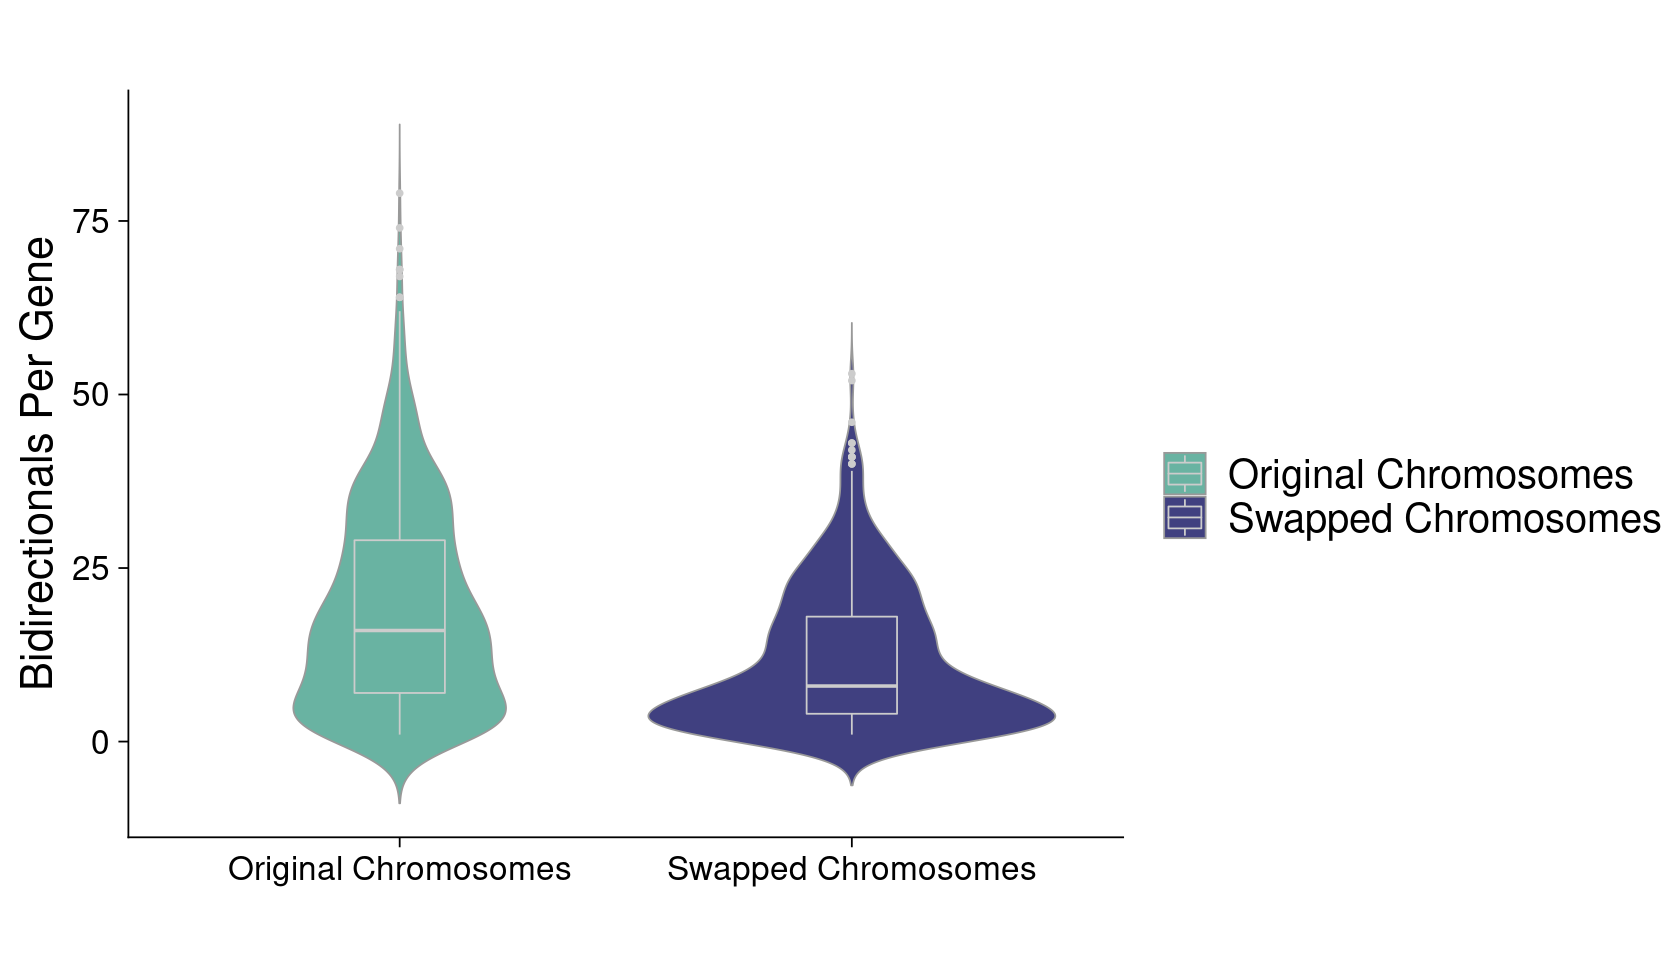

In [24]:
options(repr.plot.width=14, repr.plot.height=8)

num_bidirs_chr20_chr22_plot <- ggplot(num_bidirs_per_gene,
                          aes(x=type, y=Freq, fill=type)) +
geom_violin(trim=FALSE, color="gray60")+
scale_fill_manual(values=c("#69b3a2", "#404080")) +
geom_boxplot(width=0.2, color='gray80') + 
theme_cowplot(24) + 
ggtitle(" ") +
ylab("Bidirectionals Per Gene") +
xlab(" ") +
labs(fill=" ") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_chr22_plot

In [25]:
median(num_bidirs_per_gene_swap$Freq)
median(num_bidirs_per_gene_true$Freq)

[1] 8

[1] 16

### Seprating the pairs by chromosome

In [26]:
get_chr_pairs <- function(dataset, chromosome_id){
    
    filtered_dataset <- subset(dataset, Chr==chromosome_id)
    
    return(filtered_dataset)
    
}

In [27]:

chromosome_data_sets <- list()
chromosome_list <- list('chr20','chr22')

for (i in 1:length(chromosome_list)){
    
    chromosome_data_sets[[i]] <- get_chr_pairs(tissue_true_sig_uniq, 
                                               chromosome_list[[i]])
}

for (i in 1:length(chromosome_list)){
    
    j = i+2
    chromosome_data_sets[[j]] <- get_chr_pairs(tissue_swap_sig_uniq, 
                                               chromosome_list[[i]])
    
}



In [28]:
num_bidirs_per_gene_list <- list()
num_genes_per_bidir_list <- list()

for (i in 1:length(chromosome_data_sets)){
    
    chromosome_id <- as.character(unique(chromosome_data_sets[[i]]$Chr))
    type_id <- as.character(unique(chromosome_data_sets[[i]]$type))
    
    ##count the number of times the genes appear in the table
    bidir_counts <- as.data.frame(table(as.character(chromosome_data_sets[[i]]$transcript_1)))
    bidir_counts$Chr <- chromosome_id
    bidir_counts$type <- type_id
    
    num_bidirs_per_gene_list[[i]] <- bidir_counts
    
    ##count the number of times the bidirs appear in the table
    gene_counts <- as.data.frame(table(as.character(chromosome_data_sets[[i]]$transcript_2)))
    gene_counts$Chr <- chromosome_id
    gene_counts$type <- type_id
    
    num_genes_per_bidir_list[[i]] <- gene_counts
}

In [29]:
num_bidirs_per_gene <- do.call(rbind, num_bidirs_per_gene_list)
num_genes_per_bidir <- do.call(rbind, num_genes_per_bidir_list)
nrow(num_bidirs_per_gene)
nrow(num_genes_per_bidir)

[1] 1683

[1] 3175

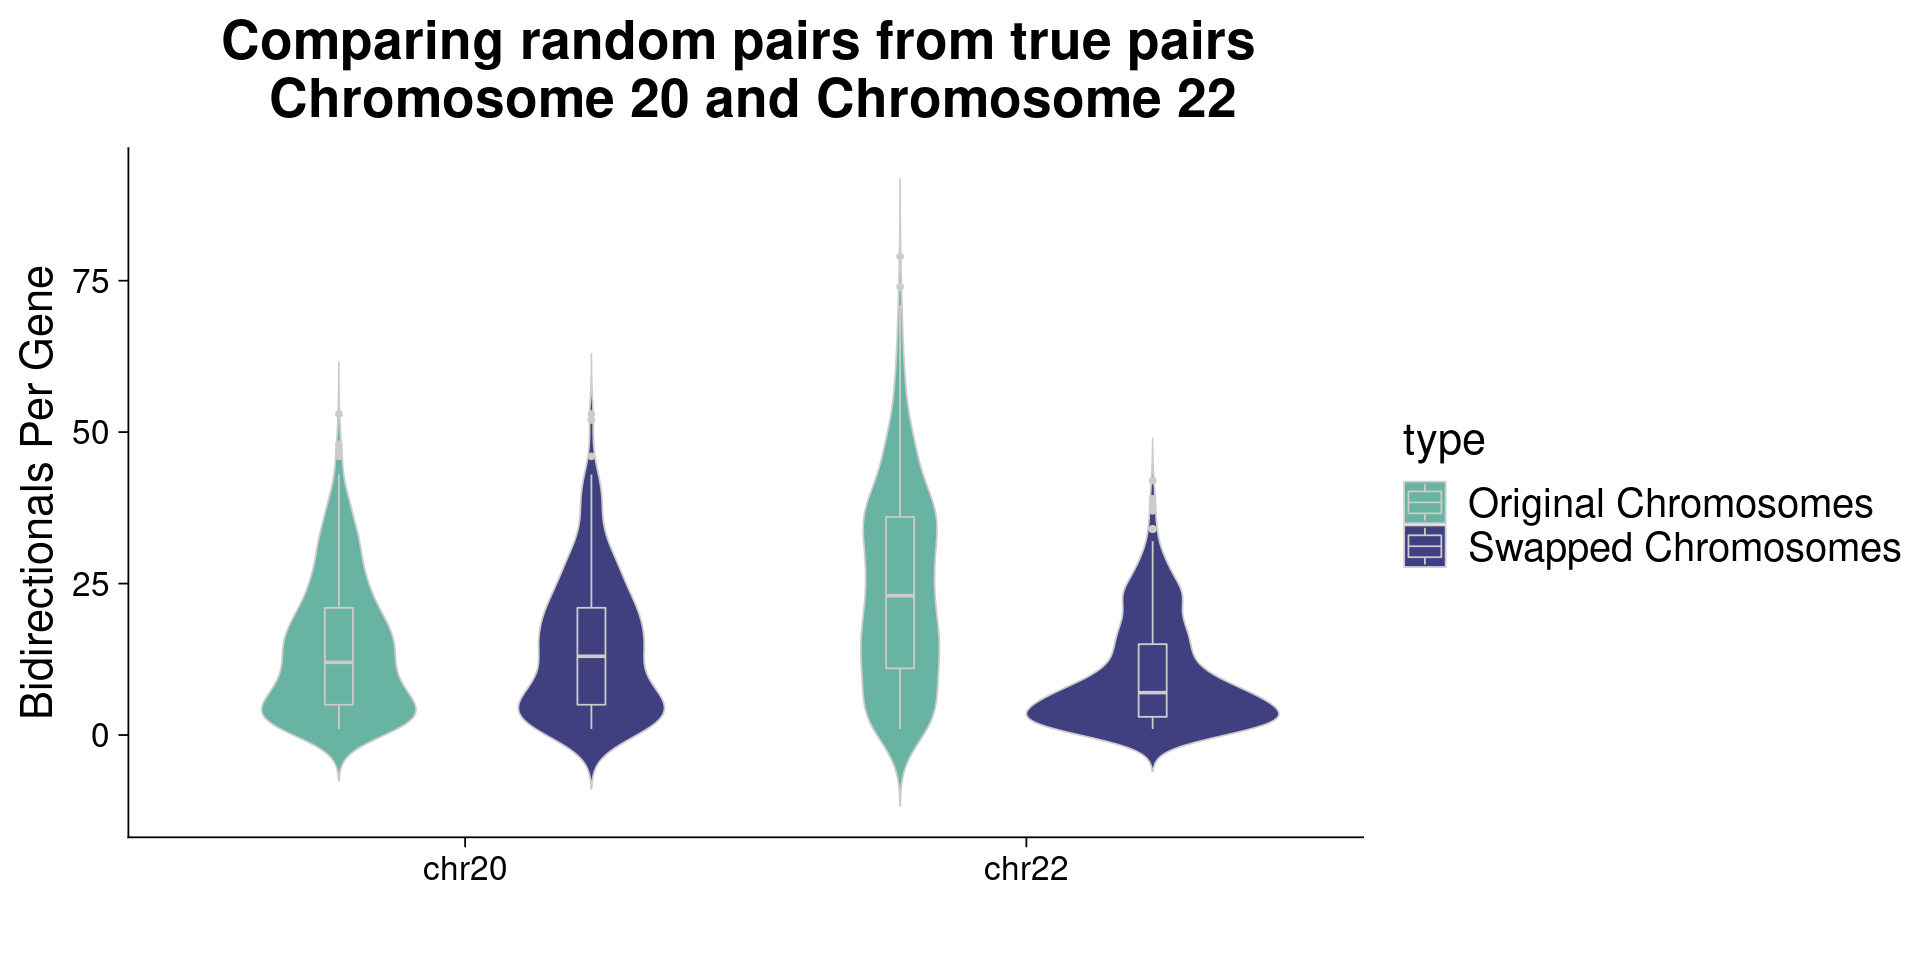

In [30]:
options(repr.plot.width=16, repr.plot.height=8)

num_bidirs_chr20_chr22_plot2 <- ggplot(num_bidirs_per_gene,
                          aes(x=Chr, y=Freq, fill=type)) +
geom_violin(trim=FALSE, 
            color="gray80",
            position = position_dodge(0.9))+
geom_boxplot(width=0.1, 
             color='gray80',
            position = position_dodge(0.9)) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Comparing random pairs from true pairs \n Chromosome 20 and Chromosome 22") +
ylab("Bidirectionals Per Gene") +
xlab(" ") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_chr22_plot2

In [31]:
for (i in 1:length(num_bidirs_per_gene_list)){
    
    print(paste(unique(num_genes_per_bidir_list[[i]]$Chr),':',
                (unique(num_genes_per_bidir_list[[i]]$type))))
    print(paste("Median =",(median(num_genes_per_bidir_list[[i]]$Freq))))
    
}

[1] "chr20 : Original Chromosomes"
[1] "Median = 4"
[1] "chr22 : Original Chromosomes"
[1] "Median = 9"
[1] "chr20 : Swapped Chromosomes"
[1] "Median = 4"
[1] "chr22 : Swapped Chromosomes"
[1] "Median = 5"


In [32]:
for (i in 1:length(num_bidirs_per_gene_list)){
    
    print(paste(unique(num_bidirs_per_gene_list[[i]]$Chr),':',
                (unique(num_bidirs_per_gene_list[[i]]$type))))
    print(paste("Median =",(median(num_bidirs_per_gene_list[[i]]$Freq))))
    
}

[1] "chr20 : Original Chromosomes"
[1] "Median = 12"
[1] "chr22 : Original Chromosomes"
[1] "Median = 23"
[1] "chr20 : Swapped Chromosomes"
[1] "Median = 13"
[1] "chr22 : Swapped Chromosomes"
[1] "Median = 7"


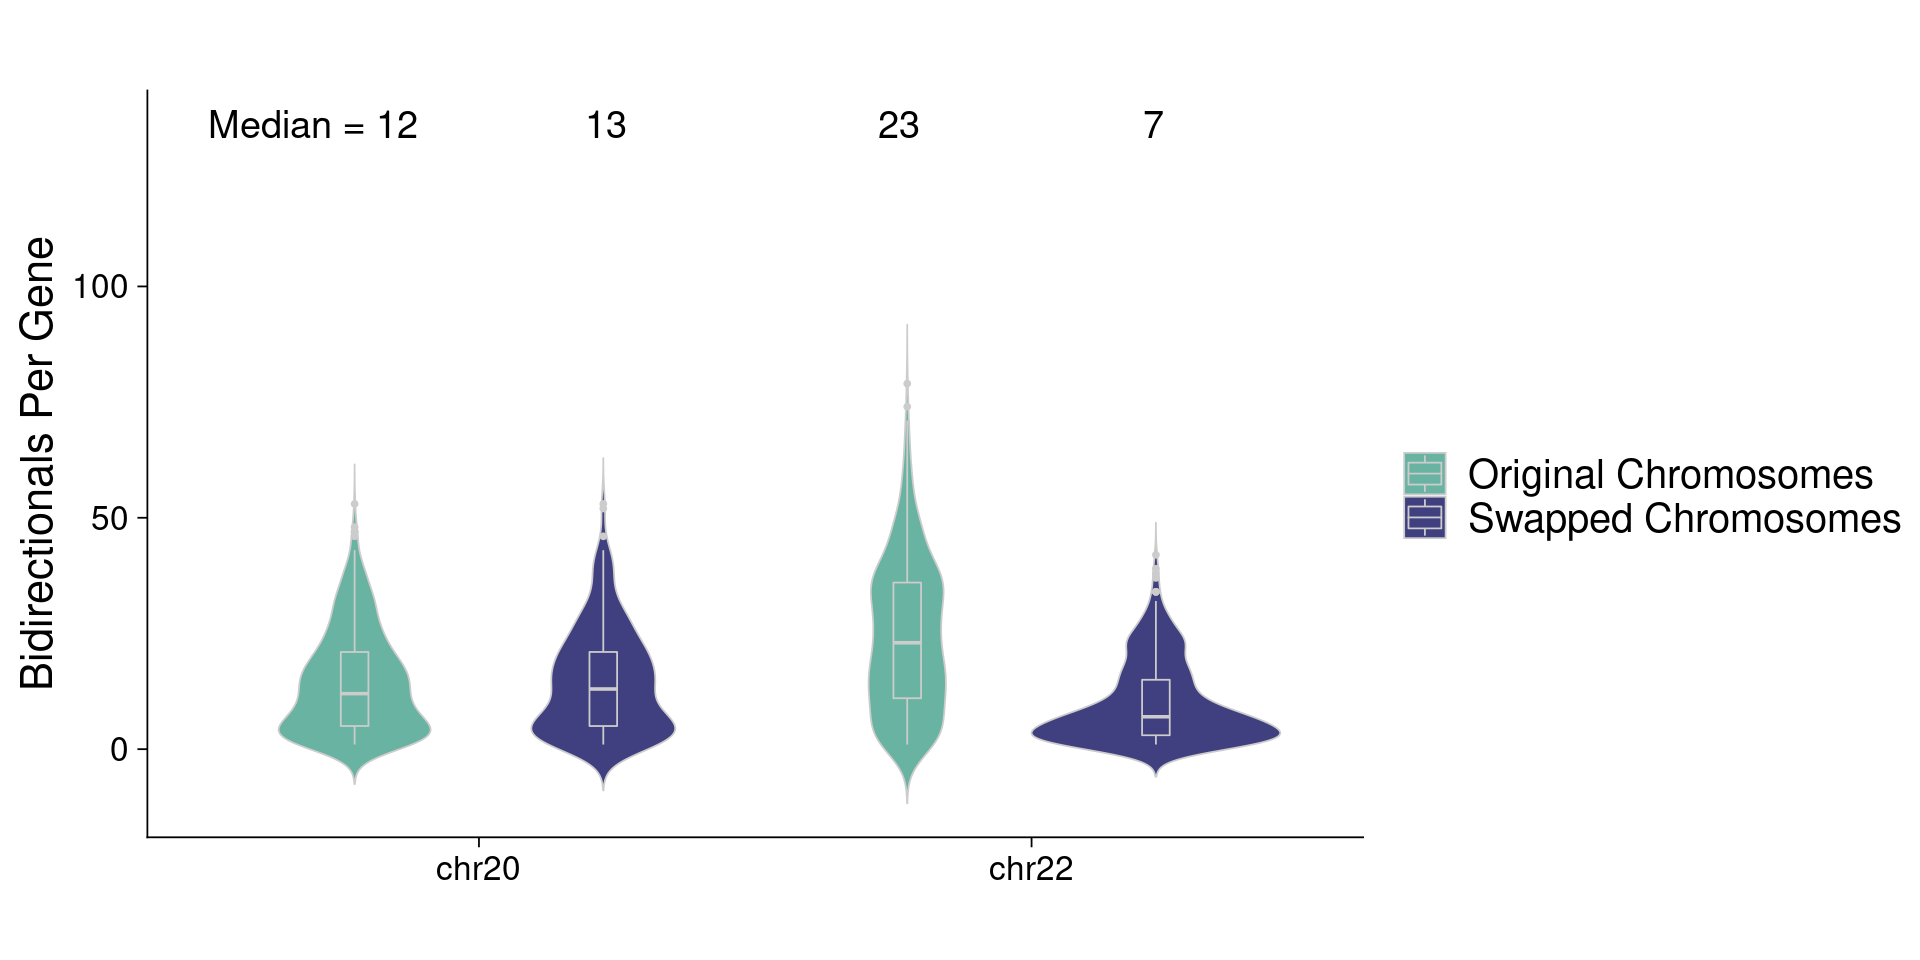

In [33]:
options(repr.plot.width=16, repr.plot.height=8)

num_bidirs_chr20_chr22_plot3 <- ggplot(num_bidirs_per_gene,
                          aes(x=Chr, y=Freq, fill=type)) +
geom_violin(trim=FALSE, 
            color="gray80",
            position = position_dodge(0.9))+
geom_boxplot(width=0.1, 
             color='gray80',
            position = position_dodge(0.9)) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle(" ") +
ylab("Bidirectionals Per Gene") +
annotate(geom="text", x=0.7, y=135, label="Median = 12",
              color="black", size=8) +
annotate(geom="text", x=1.23, y=135, label="13",
              color="black", size=8) +
annotate(geom="text", x=1.76, y=135, label="23",
              color="black", size=8) +
annotate(geom="text", x=2.22, y=135, label="7",
              color="black", size=8) +
xlab(" ") +
labs(fill=" ") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_chr22_plot3

#### Save plots

In [34]:
ggsave(num_bidirs_chr20_chr22_plot3, width = 16, height = 8,
       filename = '/Users/rusi2317/projects/DBNascent_Analysis/figures/num_bidirs_chr20_chr22_swapped.pdf',
      bg = "transparent")


In [35]:
head(num_bidirs_per_gene_list[[1]])

Var1   Freq Chr   type                
1 AAR2   22   chr20 Original Chromosomes
2 ABALON 28   chr20 Original Chromosomes
3 ABHD12 10   chr20 Original Chromosomes
4 ACOT8  15   chr20 Original Chromosomes
5 ACSS1   8   chr20 Original Chromosomes
6 ACSS2  11   chr20 Original Chromosomes

In [36]:
head(num_bidirs_per_gene_list[[3]])

Var1   Freq Chr   type               
1 AAR2   28   chr20 Swapped Chromosomes
2 ABALON 29   chr20 Swapped Chromosomes
3 ABHD12 43   chr20 Swapped Chromosomes
4 ACOT8  35   chr20 Swapped Chromosomes
5 ACSS1  24   chr20 Swapped Chromosomes
6 ACSS2   1   chr20 Swapped Chromosomes

In [37]:
num_bidirs_per_gene_chr20 <- merge(num_bidirs_per_gene_list[[1]],
                                   num_bidirs_per_gene_list[[3]], by='Var1')


num_bidirs_per_gene_chr22 <- merge(num_bidirs_per_gene_list[[2]],
                                   num_bidirs_per_gene_list[[4]], by='Var1')

In [38]:
head(tissue_true_sig_DT)

transcript_1   transcript_2                     
1 ZNF337         chr20-25448768-25449160-tfit,dreg
2 VAPB           chr20-58452516-58453408-tfit     
3 UBOX5          chr20-3884744-3885971-tfit,dreg  
4 UBE2C          chr20-45817691-45817999-dreg     
5 TMEM189-UBE2V1 chr20-49105790-49107510-tfit,dreg
6 TASP1          chr20-13361341-13365059-tfit,dreg
  pair_id                                          pcc       adj_p_BH    
1 ZNF337:chr20-25448768-25449160-tfit,dreg         0.8188029 7.538613e-50
2 VAPB:chr20-58452516-58453408-tfit                0.8272616 9.545650e-55
3 UBOX5:chr20-3884744-3885971-tfit,dreg            0.8032644 2.348555e-49
4 UBE2C:chr20-45817691-45817999-dreg               0.8358904 3.477734e-54
5 TMEM189-UBE2V1:chr20-49105790-49107510-tfit,dreg 0.8575779 1.610195e-63
6 TASP1:chr20-13361341-13365059-tfit,dreg          0.8194380 1.201838e-51
  pval         t        nObs transcript1_start transcript1_end
1 9.983182e-54 20.91367 217  25673195          25686189       
2 9.182385e-59 22.18508 229  58389979          58451100       
3 3.236264e-53 20.36361 230   3107573           3159115       
4 3.476387e-58 22.38133 218  45813745          45816952       
5 9.043652e-68 25.17554 230  50081124          50153048       
6 1.420296e-55 21.30153 224  13389394          13638182       
  transcript1_biotype transcript2_start transcript2_end transcript2_biotype
1 Gene                25448768          25449160        Tfit & dREG        
2 Gene                58452516          58453408        Tfit               
3 Gene                 3884744           3885971        Tfit & dREG        
4 Gene                45817691          45817999        dREG               
5 Gene                49105790          49107510        Tfit & dREG        
6 Gene                13361341          13365059        Tfit & dREG        
  distance tissue percent_transcribed_both Chr   type                
1 -224427  blood   94.34783                chr20 Original Chromosomes
2   62537  blood   99.56522                chr20 Original Chromosomes
3  777171  blood  100.00000                chr20 Original Chromosomes
4    3946  blood   94.78261                chr20 Original Chromosomes
5 -975334  blood  100.00000                chr20 Original Chromosomes
6  -28053  blood   97.39130                chr20 Original Chromosomes

In [39]:
tissue_true_sig_DT_uniq <- unique(tissue_true_sig_DT[,c('transcript_1',
                                                                  'percent_transcribed_both')])
tissue_true_sig_DT_uniq2 <- tissue_true_sig_DT_uniq %>%
                                    group_by(transcript_1) %>%
                                    summarise_each(funs(max, min, mean, median),
                                                   percent_transcribed_both)
dim(tissue_true_sig_DT_uniq2)
head(tissue_true_sig_DT_uniq2)
dim(tissue_true_sig_DT_uniq)
head(tissue_true_sig_DT_uniq) 

Warning message:
“`summarise_each_()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


[1] 981   5

transcript_1 max       min      mean     median  
1 A4GALT        88.07339 88.07339 88.07339 88.07339
2 AAR2         100.00000 77.41935 91.11692 93.36510
3 ABALON       100.00000 76.36364 90.32925 90.37868
4 ABHD12       100.00000 77.27273 88.44641 87.50000
5 ACO2         100.00000 77.27273 91.68008 93.18182
6 ACOT8        100.00000 77.27273 91.50298 93.75000

[1] 13745     2

transcript_1   percent_transcribed_both
1 ZNF337          94.34783               
2 VAPB            99.56522               
3 UBOX5          100.00000               
4 UBE2C           94.78261               
5 TMEM189-UBE2V1 100.00000               
6 TASP1           97.39130

In [40]:
dim(num_bidirs_per_gene_chr20)
num_bidirs_per_gene_chr20_2 <-merge(num_bidirs_per_gene_chr20, 
                                    tissue_true_sig_DT_uniq2,
                                    by.x='Var1', by.y='transcript_1')
dim(num_bidirs_per_gene_chr20_2)
head(num_bidirs_per_gene_chr20_2)
tail(num_bidirs_per_gene_chr20_2)

[1] 264   7

[1] 264  11

Var1   Freq.x Chr.x type.x               Freq.y Chr.y type.y             
1 AAR2   22     chr20 Original Chromosomes 28     chr20 Swapped Chromosomes
2 ABALON 28     chr20 Original Chromosomes 29     chr20 Swapped Chromosomes
3 ABHD12 10     chr20 Original Chromosomes 43     chr20 Swapped Chromosomes
4 ACOT8  15     chr20 Original Chromosomes 35     chr20 Swapped Chromosomes
5 ACSS1   8     chr20 Original Chromosomes 24     chr20 Swapped Chromosomes
6 ACSS2  11     chr20 Original Chromosomes  1     chr20 Swapped Chromosomes
  max       min      mean     median  
1 100.00000 77.41935 91.11692 93.36510
2 100.00000 76.36364 90.32925 90.37868
3 100.00000 77.27273 88.44641 87.50000
4 100.00000 77.27273 91.50298 93.75000
5  94.54545 80.64516 87.25121 87.18475
6 100.00000 79.16667 91.57713 92.72727

Var1       Freq.x Chr.x type.x               Freq.y Chr.y
259 ZNF337     10     chr20 Original Chromosomes 27     chr20
260 ZNF337-AS1 10     chr20 Original Chromosomes  4     chr20
261 ZNF341-AS1 13     chr20 Original Chromosomes  1     chr20
262 ZNFX1      32     chr20 Original Chromosomes 16     chr20
263 ZSWIM1     10     chr20 Original Chromosomes 15     chr20
264 ZSWIM3     12     chr20 Original Chromosomes 15     chr20
    type.y              max       min      mean     median  
259 Swapped Chromosomes 100.00000 77.27273 89.48801 93.04348
260 Swapped Chromosomes 100.00000 79.54545 91.08630 91.66667
261 Swapped Chromosomes  93.54839 80.64516 86.88731 87.09677
262 Swapped Chromosomes 100.00000 79.54545 91.91388 93.64919
263 Swapped Chromosomes 100.00000 77.27273 86.53409 85.22727
264 Swapped Chromosomes 100.00000 77.27273 89.67367 91.59091

### Scatterplots for genes and num bidirs assigned

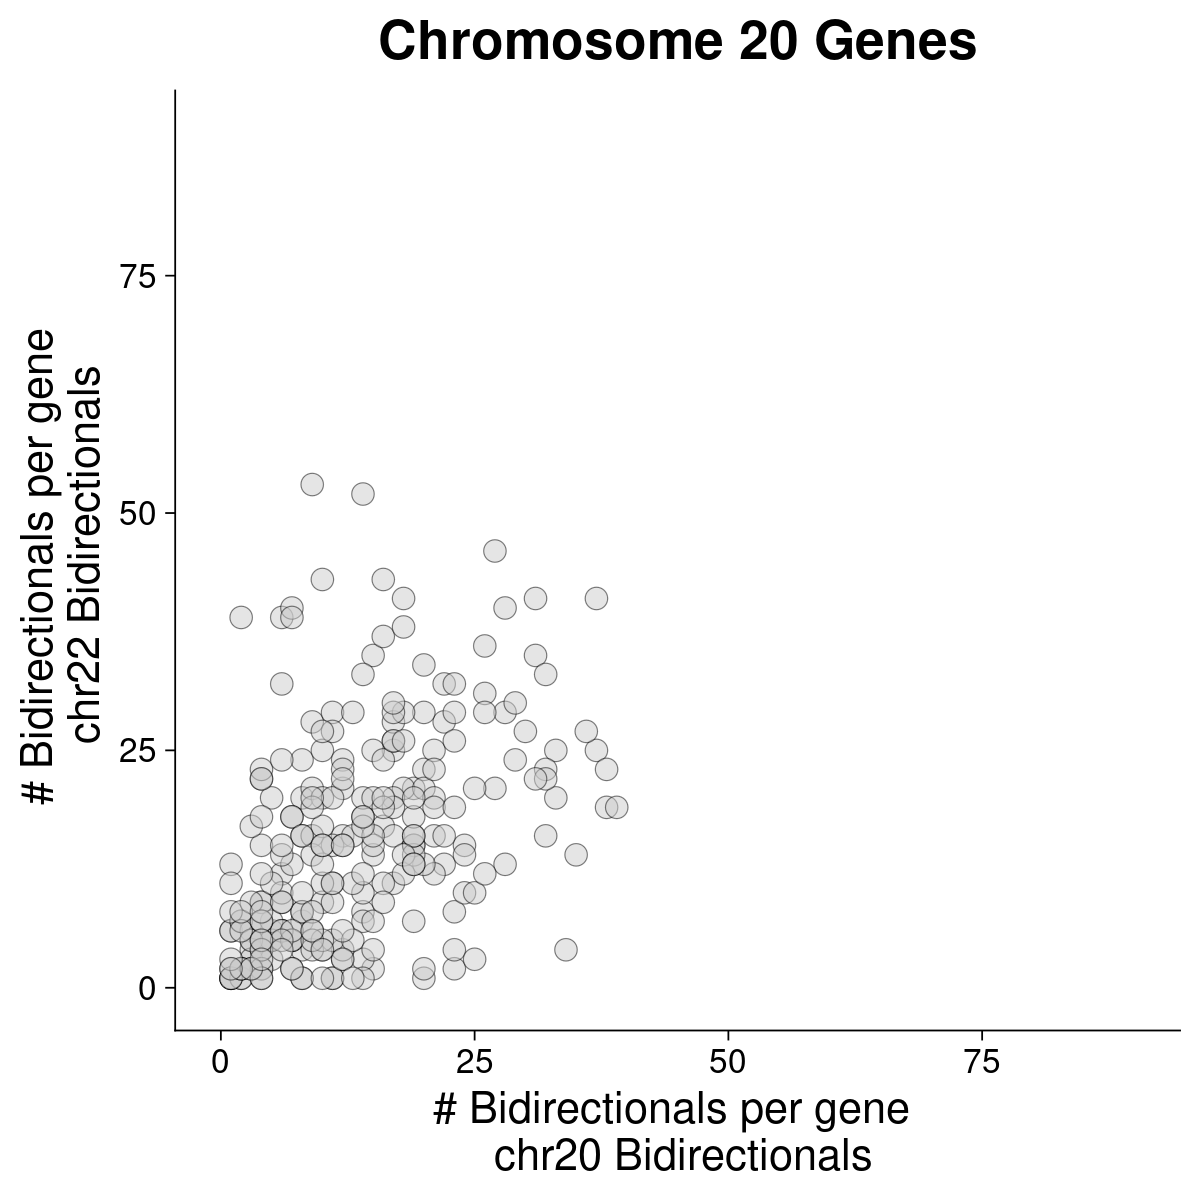

In [41]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr20_plot1 <- ggplot(num_bidirs_per_gene_chr20_2,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.5) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
labs(fill=" ") +
xlim(0,90) +
ylim(0,90) +
#geom_hline(yintercept=25,linetype=2) +
#geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot1

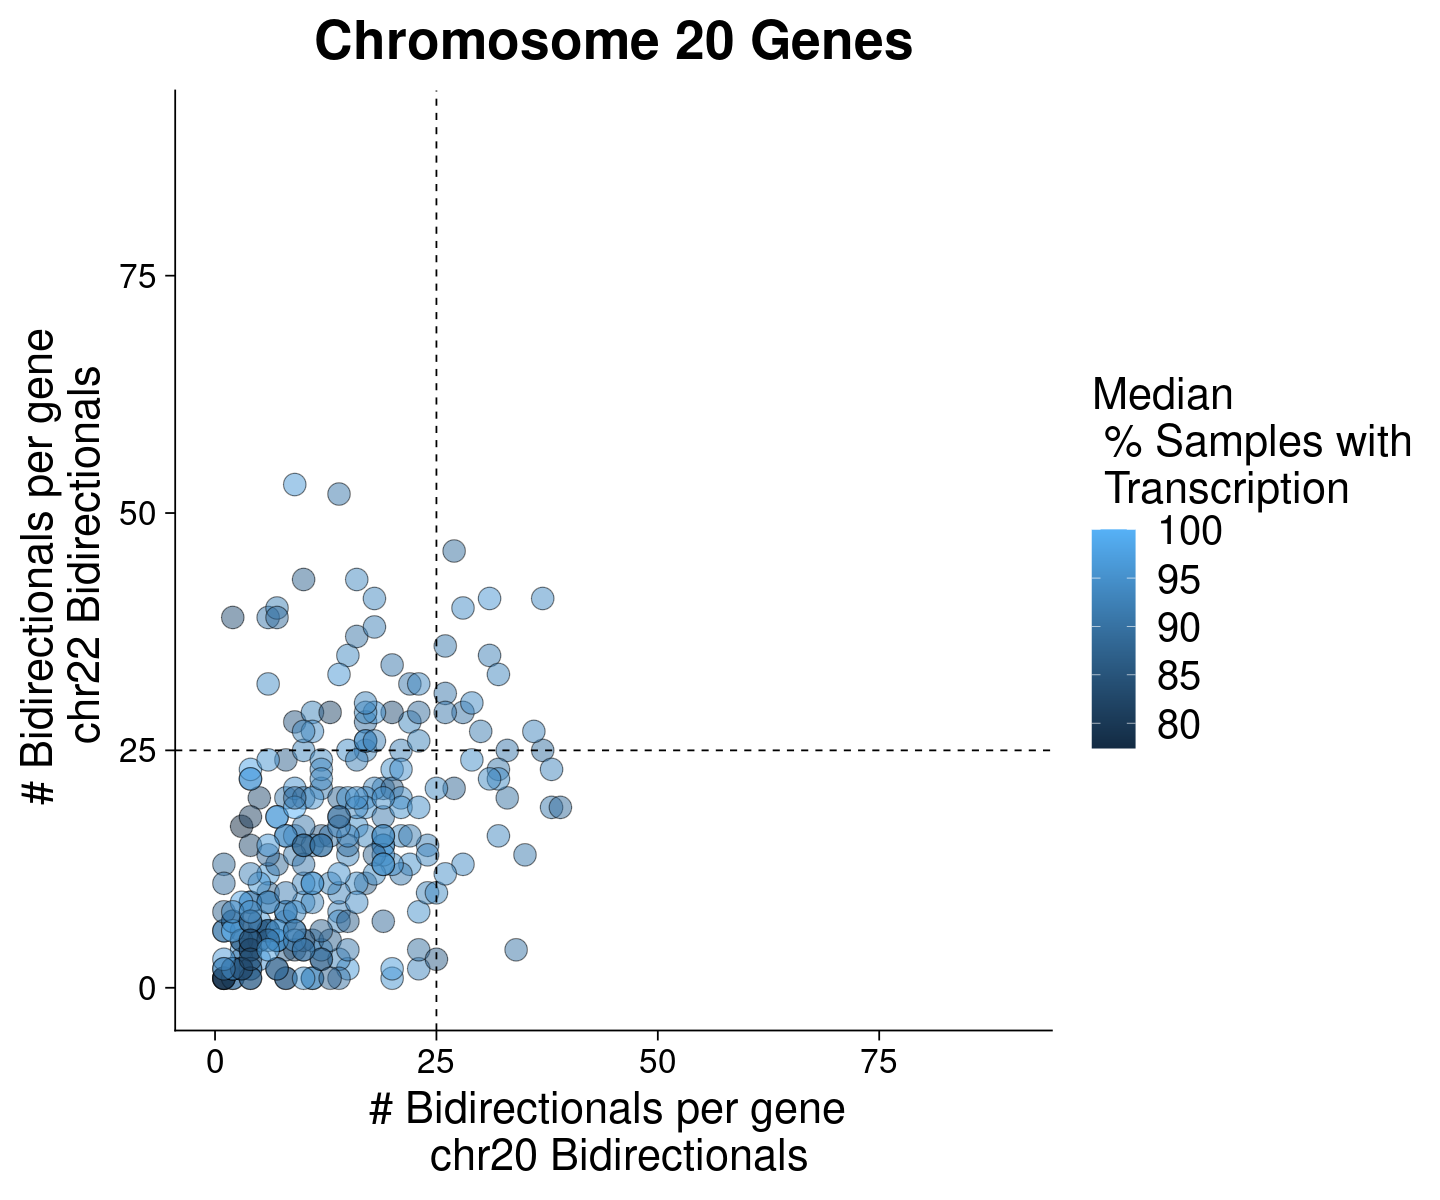

In [42]:
options(repr.plot.width=12, repr.plot.height=10)

num_bidirs_chr20_plot1a <- ggplot(num_bidirs_per_gene_chr20_2,
                          aes(x=Freq.x, y=Freq.y, fill=median)) +
geom_point(shape = 21, size=6, alpha=0.5) + 
#scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
labs(fill="Median \n % Samples with \n Transcription") +
xlim(0,90) +
ylim(0,90) +
geom_hline(yintercept=25,linetype=2) +
geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot1a

Warning message:
“Removed 62 rows containing missing values (geom_point).”


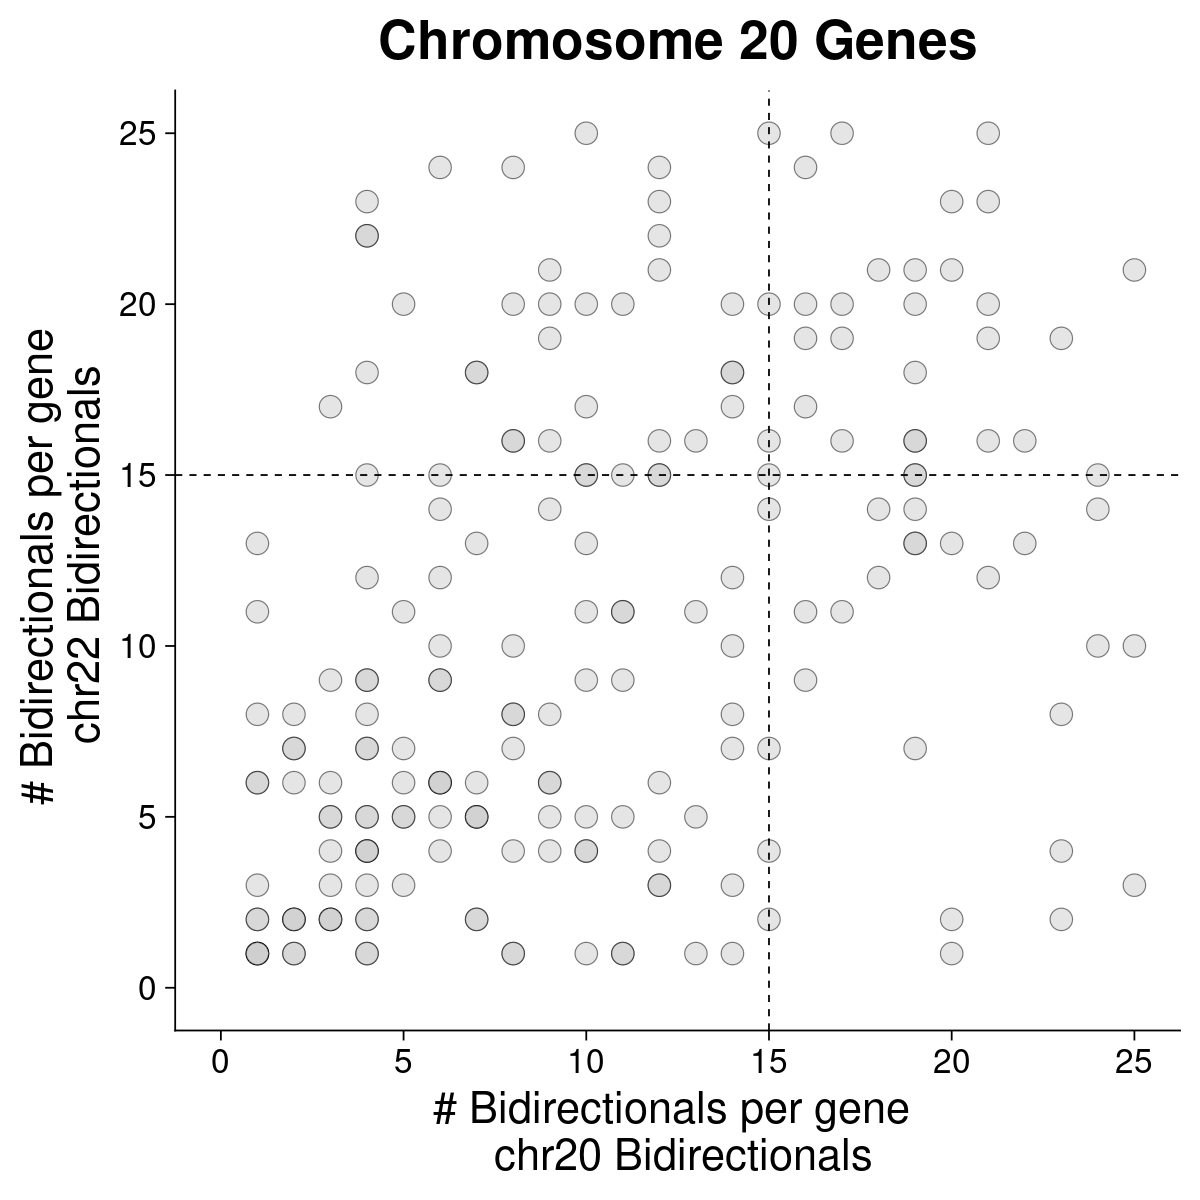

In [43]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr20_plot2 <- ggplot(num_bidirs_per_gene_chr20,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.5) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
labs(fill=" ") +
xlim(0,25) +
ylim(0,25) +
geom_hline(yintercept=15,linetype=2) +
geom_vline(xintercept=15,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot2

Warning message:
“Removed 62 rows containing missing values (geom_point).”


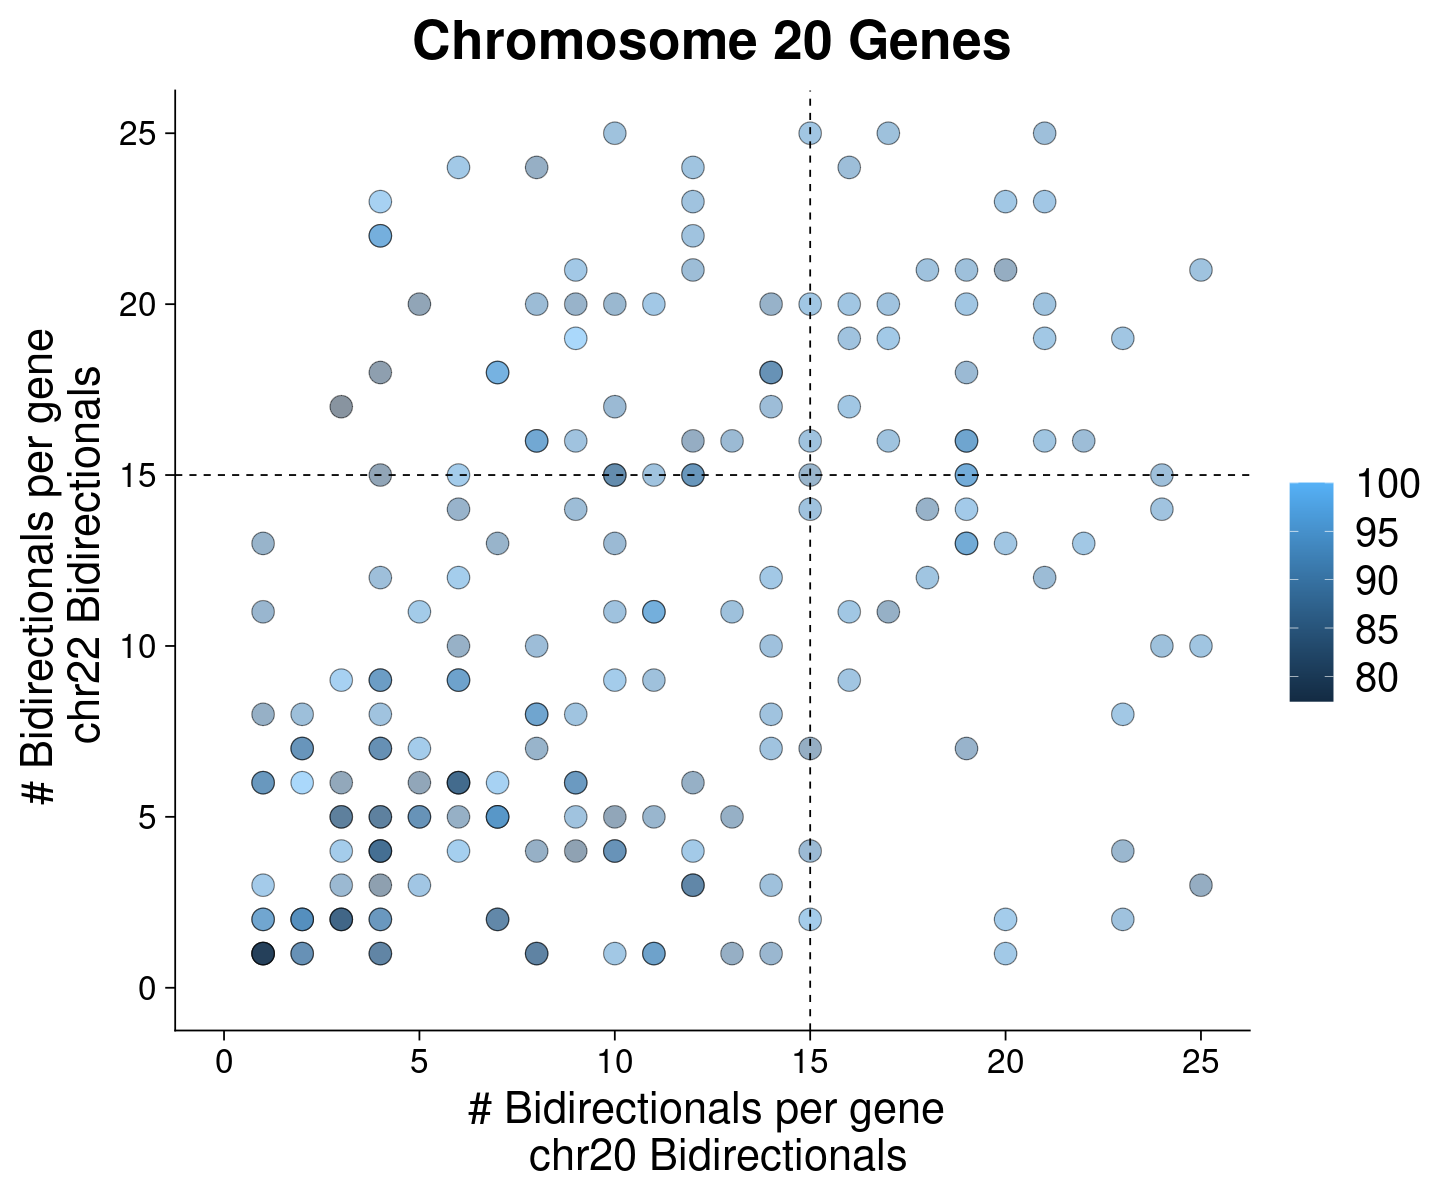

In [44]:
options(repr.plot.width=12, repr.plot.height=10)

num_bidirs_chr20_plot2a <- ggplot(num_bidirs_per_gene_chr20_2,
                          aes(x=Freq.x, y=Freq.y, fill=median)) +
geom_point(shape = 21, size=6, alpha=0.5) + 
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
labs(fill=" ") +
xlim(0,25) +
ylim(0,25) +
geom_hline(yintercept=15,linetype=2) +
geom_vline(xintercept=15,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot2a

In [45]:
head(num_bidirs_per_gene_chr22)

num_bidirs_per_gene_chr22_2 <-merge(num_bidirs_per_gene_chr22, 
                                    tissue_true_sig_DT_uniq2,
                                    by.x='Var1', by.y='transcript_1')
dim(num_bidirs_per_gene_chr22_2)
head(num_bidirs_per_gene_chr22_2)
tail(num_bidirs_per_gene_chr22_2)

Var1    Freq.x Chr.x type.x               Freq.y Chr.y type.y             
1 ACO2    71     chr22 Original Chromosomes  5     chr22 Swapped Chromosomes
2 ACR      9     chr22 Original Chromosomes  2     chr22 Swapped Chromosomes
3 ADA2    10     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes
4 ADM2    27     chr22 Original Chromosomes 18     chr22 Swapped Chromosomes
5 ADORA2A 27     chr22 Original Chromosomes  2     chr22 Swapped Chromosomes
6 ADSL    30     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes

[1] 420  11

Var1    Freq.x Chr.x type.x               Freq.y Chr.y type.y             
1 ACO2    71     chr22 Original Chromosomes  5     chr22 Swapped Chromosomes
2 ACR      9     chr22 Original Chromosomes  2     chr22 Swapped Chromosomes
3 ADA2    10     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes
4 ADM2    27     chr22 Original Chromosomes 18     chr22 Swapped Chromosomes
5 ADORA2A 27     chr22 Original Chromosomes  2     chr22 Swapped Chromosomes
6 ADSL    30     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes
  max min      mean     median  
1 100 77.27273 91.68008 93.18182
2 100 88.46154 93.26923 92.30769
3 100 87.09677 93.54839 93.54839
4 100 77.27273 90.38252 91.31514
5 100 77.41935 89.72442 90.32258
6 100 77.27273 91.41811 93.36510

Var1     Freq.x Chr.x type.x               Freq.y Chr.y type.y             
415 ZDHHC8P1  7     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes
416 ZMAT5    59     chr22 Original Chromosomes  9     chr22 Swapped Chromosomes
417 ZNF280B  22     chr22 Original Chromosomes  4     chr22 Swapped Chromosomes
418 ZNF70    12     chr22 Original Chromosomes  3     chr22 Swapped Chromosomes
419 ZNF74    35     chr22 Original Chromosomes 16     chr22 Swapped Chromosomes
420 ZNRF3    14     chr22 Original Chromosomes  1     chr22 Swapped Chromosomes
    max min      mean     median  
415 100 80.76923 91.98601 94.54545
416 100 77.27273 89.58496 90.90909
417 100 80.64516 91.05961 93.54839
418 100 77.41935 91.23054 94.09091
419 100 79.54545 91.22988 92.30769
420 100 77.27273 87.64463 85.45455

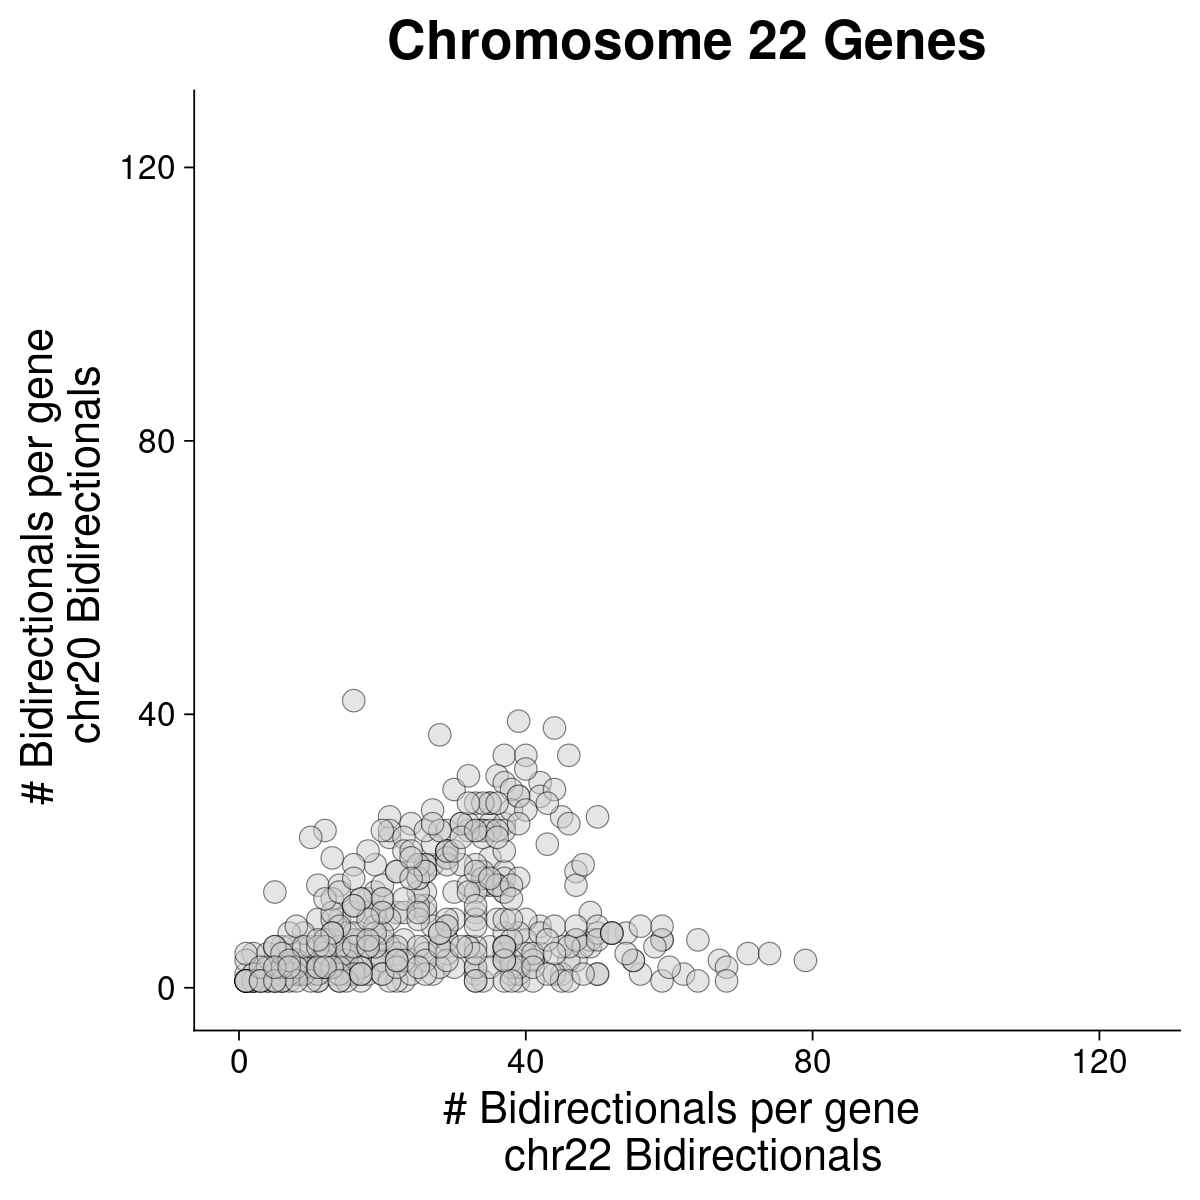

In [46]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr22_plot1 <- ggplot(num_bidirs_per_gene_chr22_2,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.5) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Chromosome 22 Genes") +
xlab("# Bidirectionals per gene \n chr22 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr20 Bidirectionals") +
labs(fill=" ") +
xlim(0,125) +
ylim(0,125) +
#geom_hline(yintercept=25,linetype=2) +
#geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr22_plot1

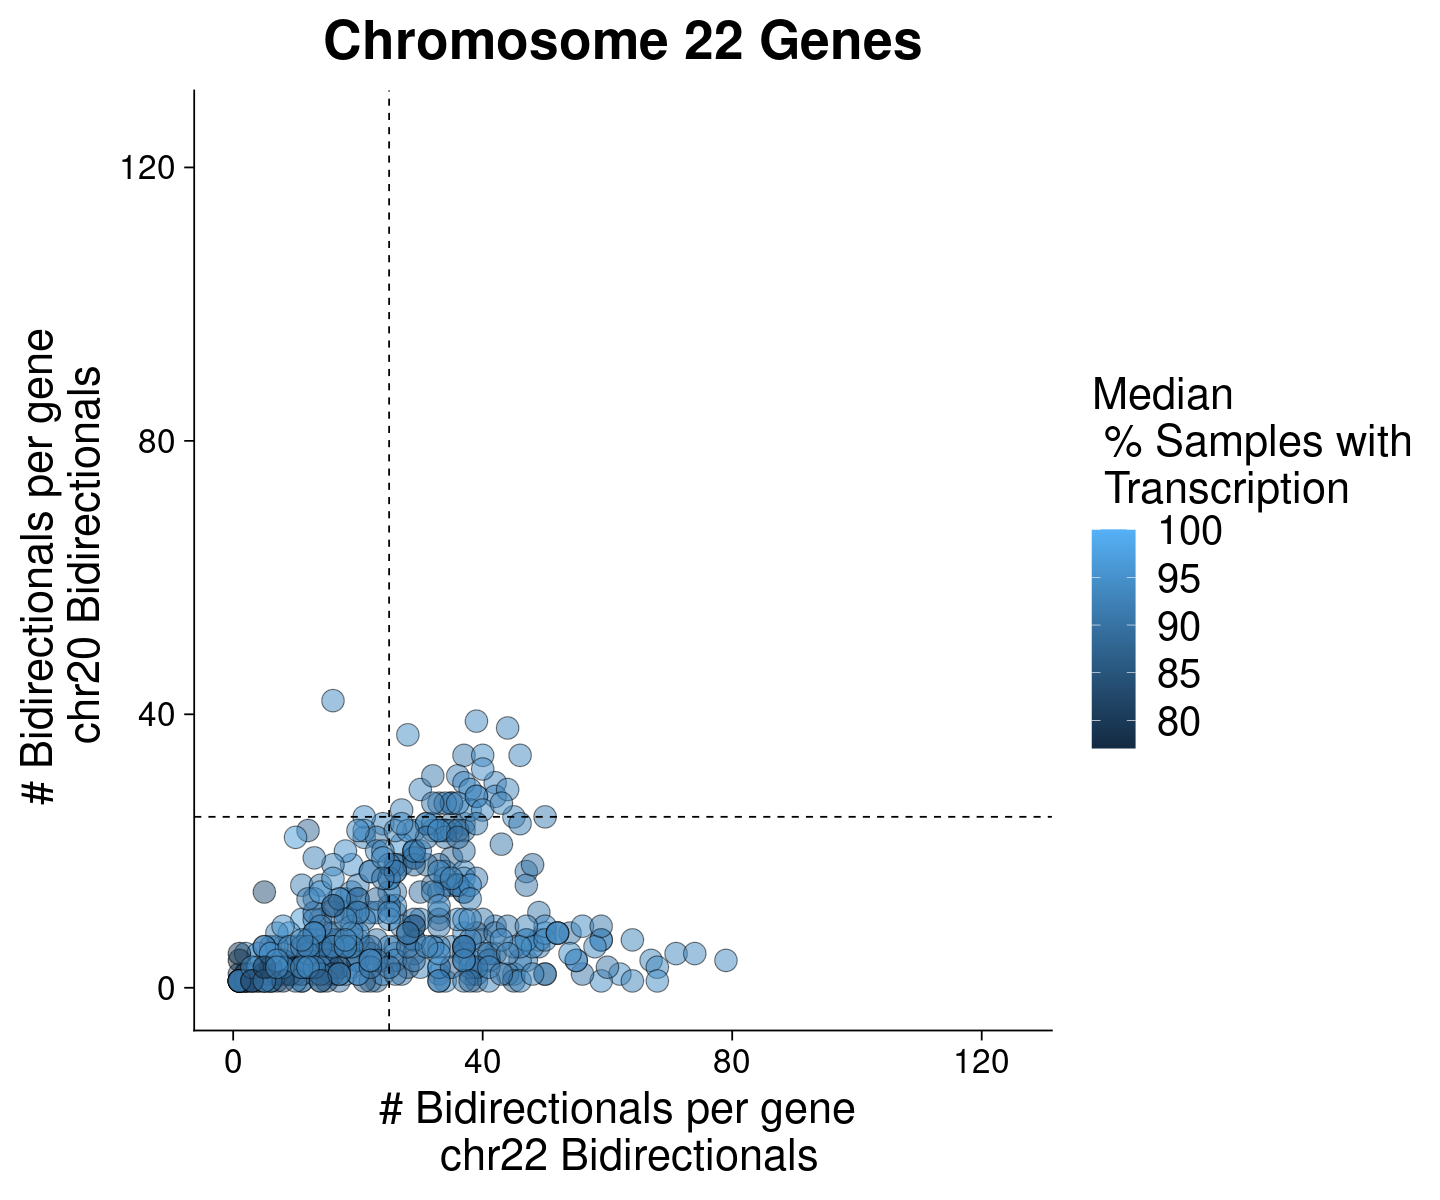

In [47]:
options(repr.plot.width=12, repr.plot.height=10)

num_bidirs_chr22_plot1a <- ggplot(num_bidirs_per_gene_chr22_2,
                          aes(x=Freq.x, y=Freq.y, fill=median)) +
geom_point(shape = 21, size=6, alpha=0.5) + 
theme_cowplot(24) + 
ggtitle("Chromosome 22 Genes") +
xlab("# Bidirectionals per gene \n chr22 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr20 Bidirectionals") +
labs(fill="Median \n % Samples with \n Transcription") +
xlim(0,125) +
ylim(0,125) +
geom_hline(yintercept=25,linetype=2) +
geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr22_plot1a

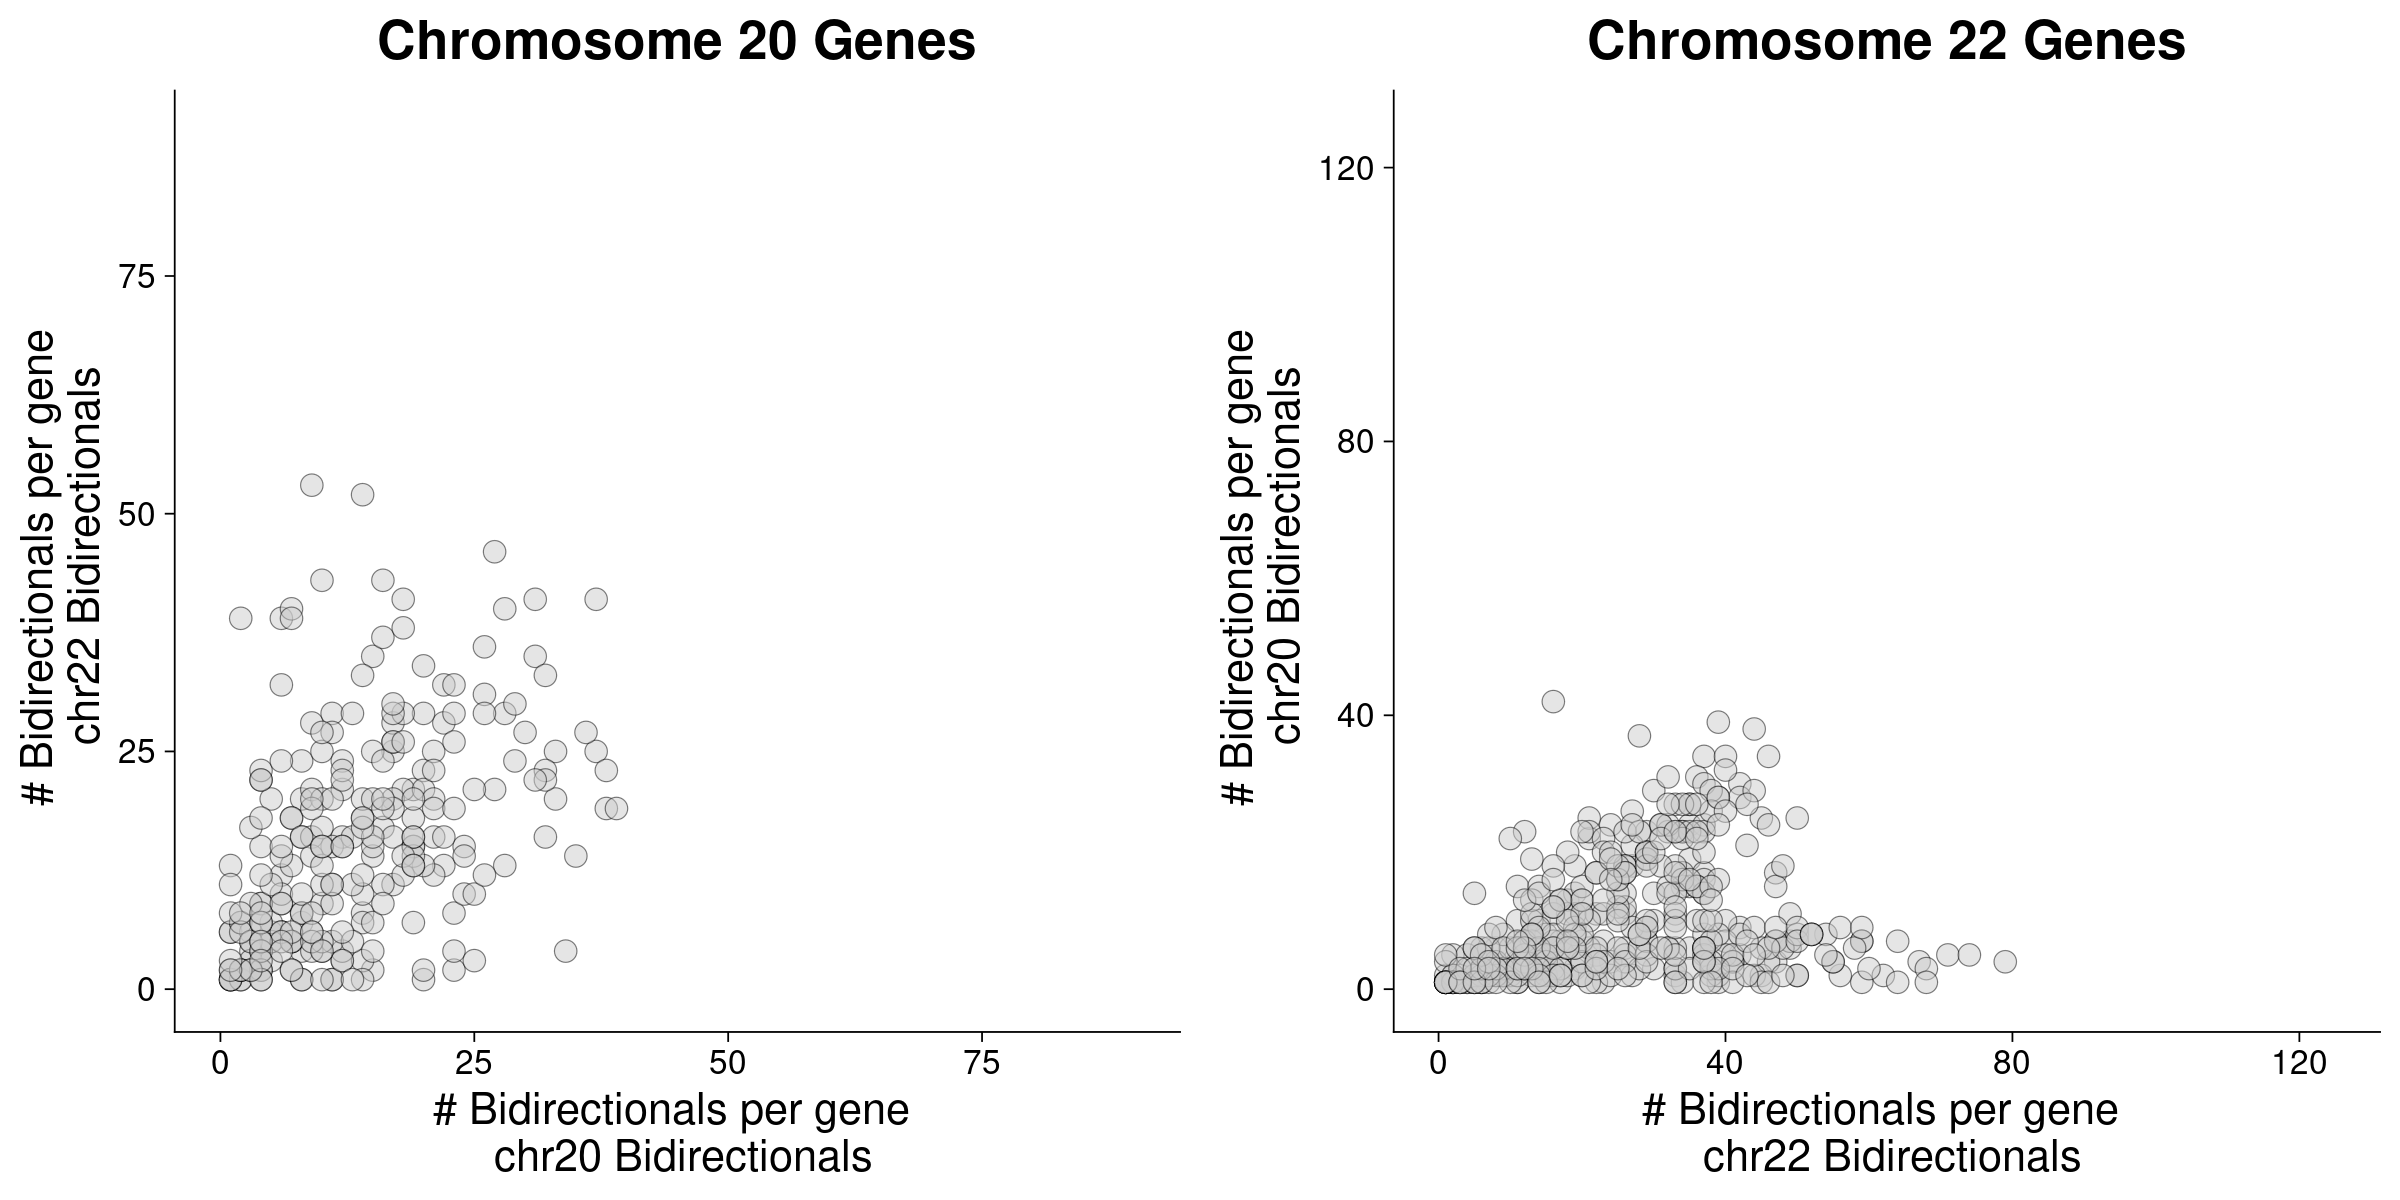

In [48]:
options(repr.plot.width=20, repr.plot.height=10)
bidir_per_gene <- cowplot::plot_grid(num_bidirs_chr20_plot1,
                                     num_bidirs_chr22_plot1, ncol=2)
bidir_per_gene

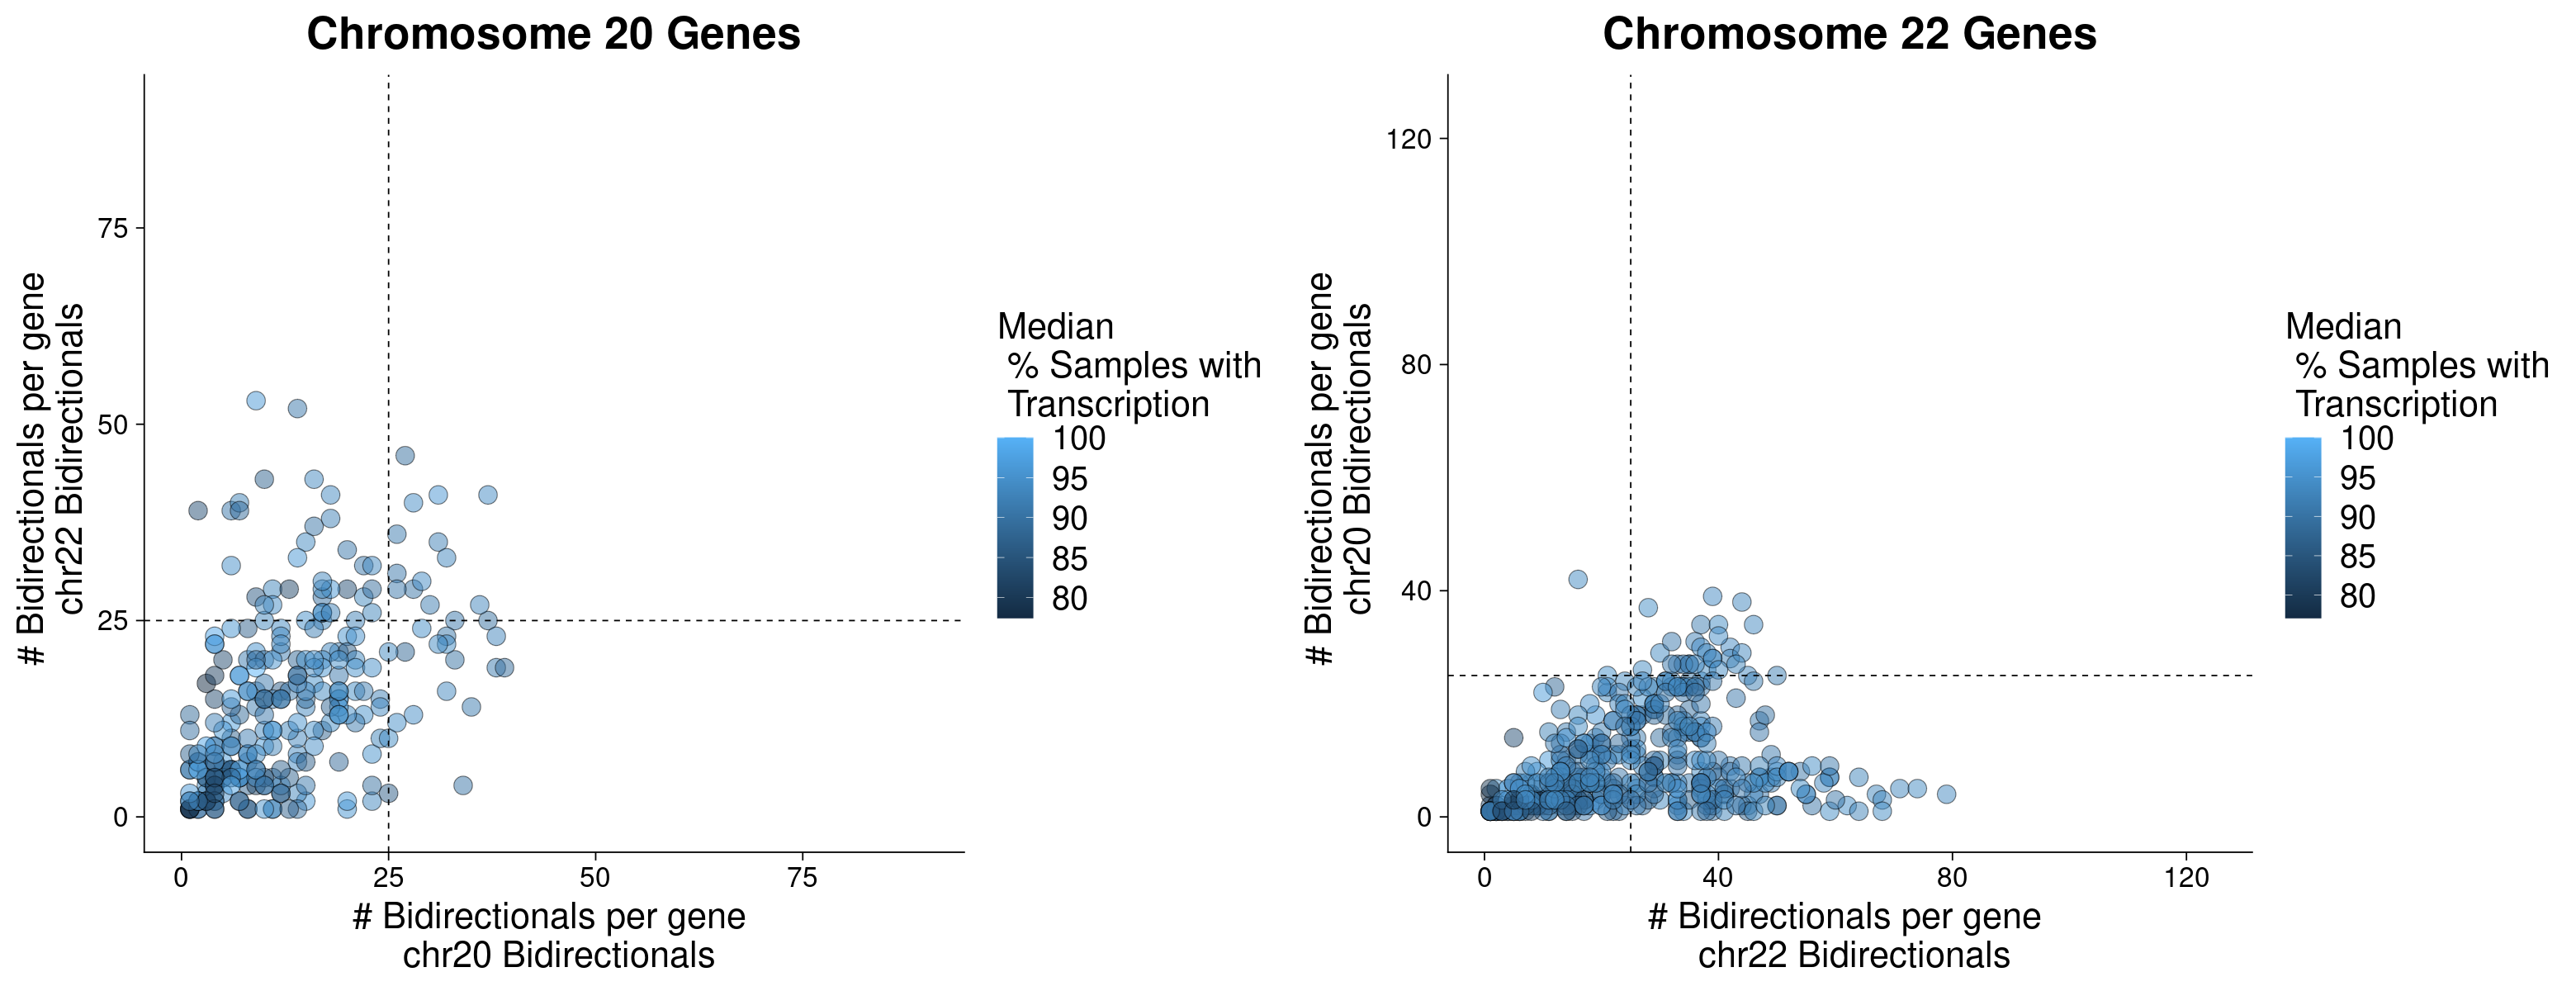

In [49]:
options(repr.plot.width=26, repr.plot.height=10)
bidir_per_gene1a <- cowplot::plot_grid(num_bidirs_chr20_plot1a,
                                     num_bidirs_chr22_plot1a, ncol=2)
bidir_per_gene1a

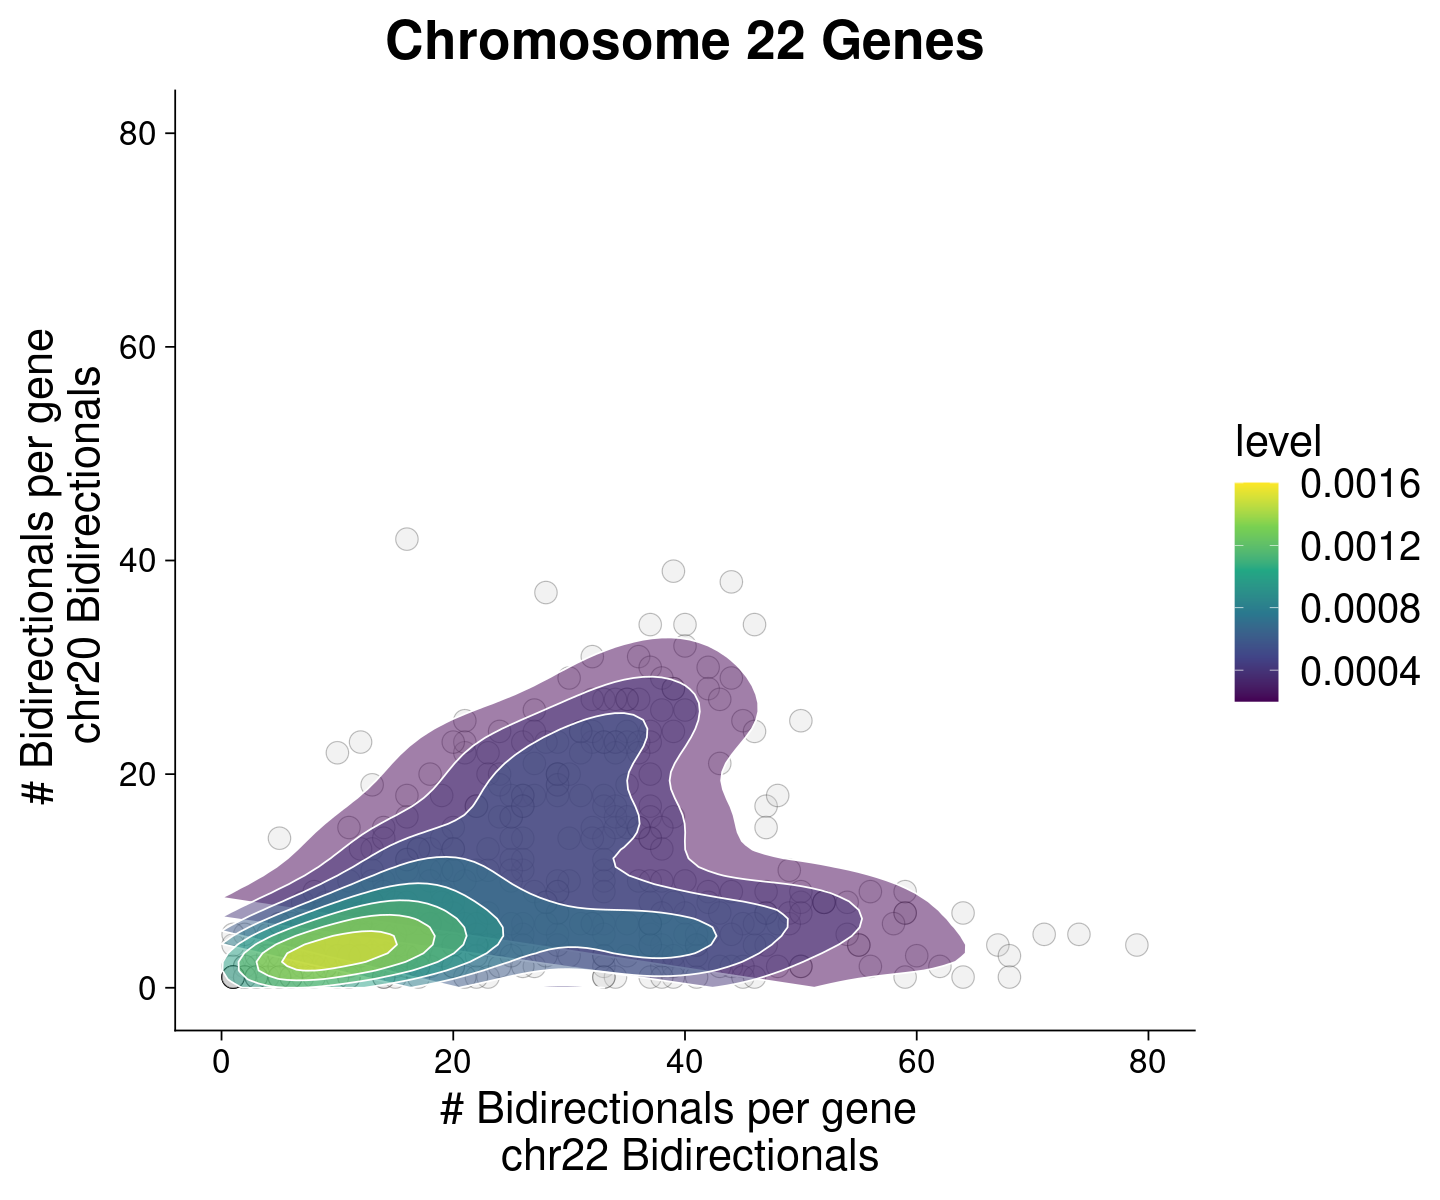

In [50]:
options(repr.plot.width=12, repr.plot.height=10)

num_bidirs_chr22_plot2 <- ggplot(num_bidirs_per_gene_chr22_2,
                          aes(x=Freq.x, y=Freq.y)) +
#geom_hex(bins = 3) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.25) +
stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white", alpha=0.5) +

scale_fill_continuous(type = "viridis") +
theme_cowplot(24) + 
ggtitle("Chromosome 22 Genes") +
xlab("# Bidirectionals per gene \n chr22 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr20 Bidirectionals") +
#labs(fill=" ") +
xlim(0,80) +
ylim(0,80) +
#geom_hline(yintercept=25,linetype=2) +
#geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr22_plot2

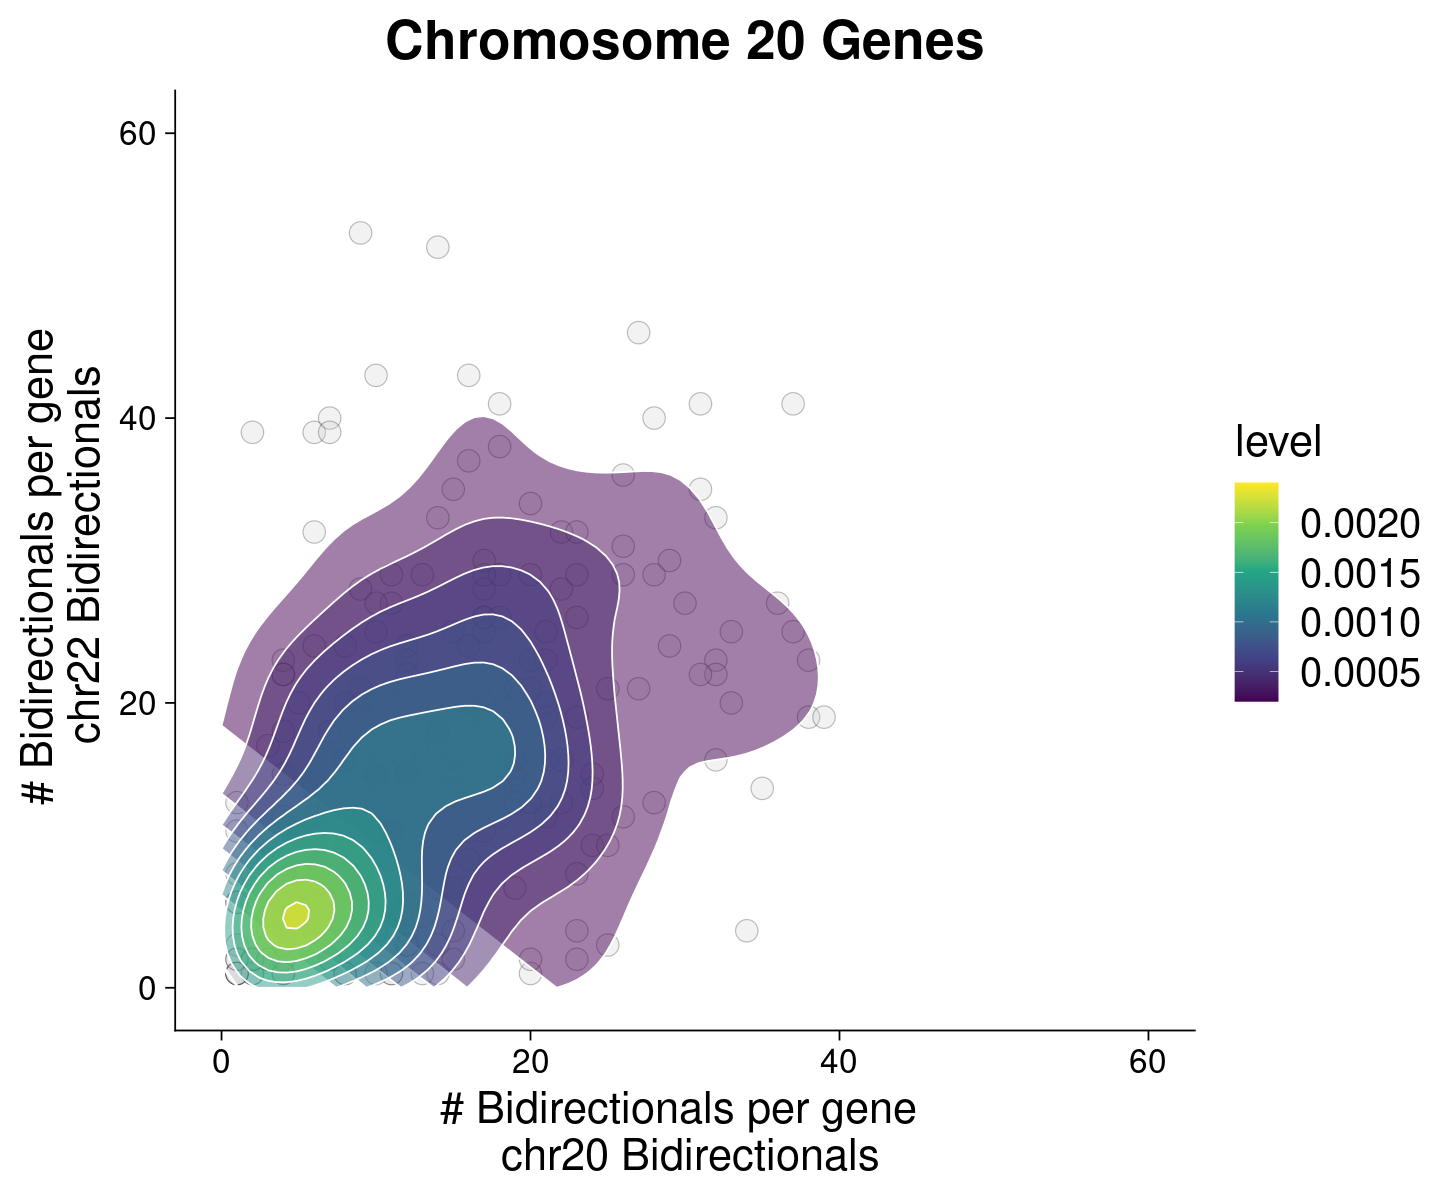

In [51]:
options(repr.plot.width=12, repr.plot.height=10)

num_bidirs_chr20_plot2 <- ggplot(num_bidirs_per_gene_chr20_2,
                          aes(x=Freq.x, y=Freq.y)) +
#geom_hex(bins = 3) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.25) +
stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white", alpha=0.5) +

scale_fill_continuous(type = "viridis") +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
#labs(fill=" ") +
xlim(0,60) +
ylim(0,60) +
#geom_hline(yintercept=25,linetype=2) +
#geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot2

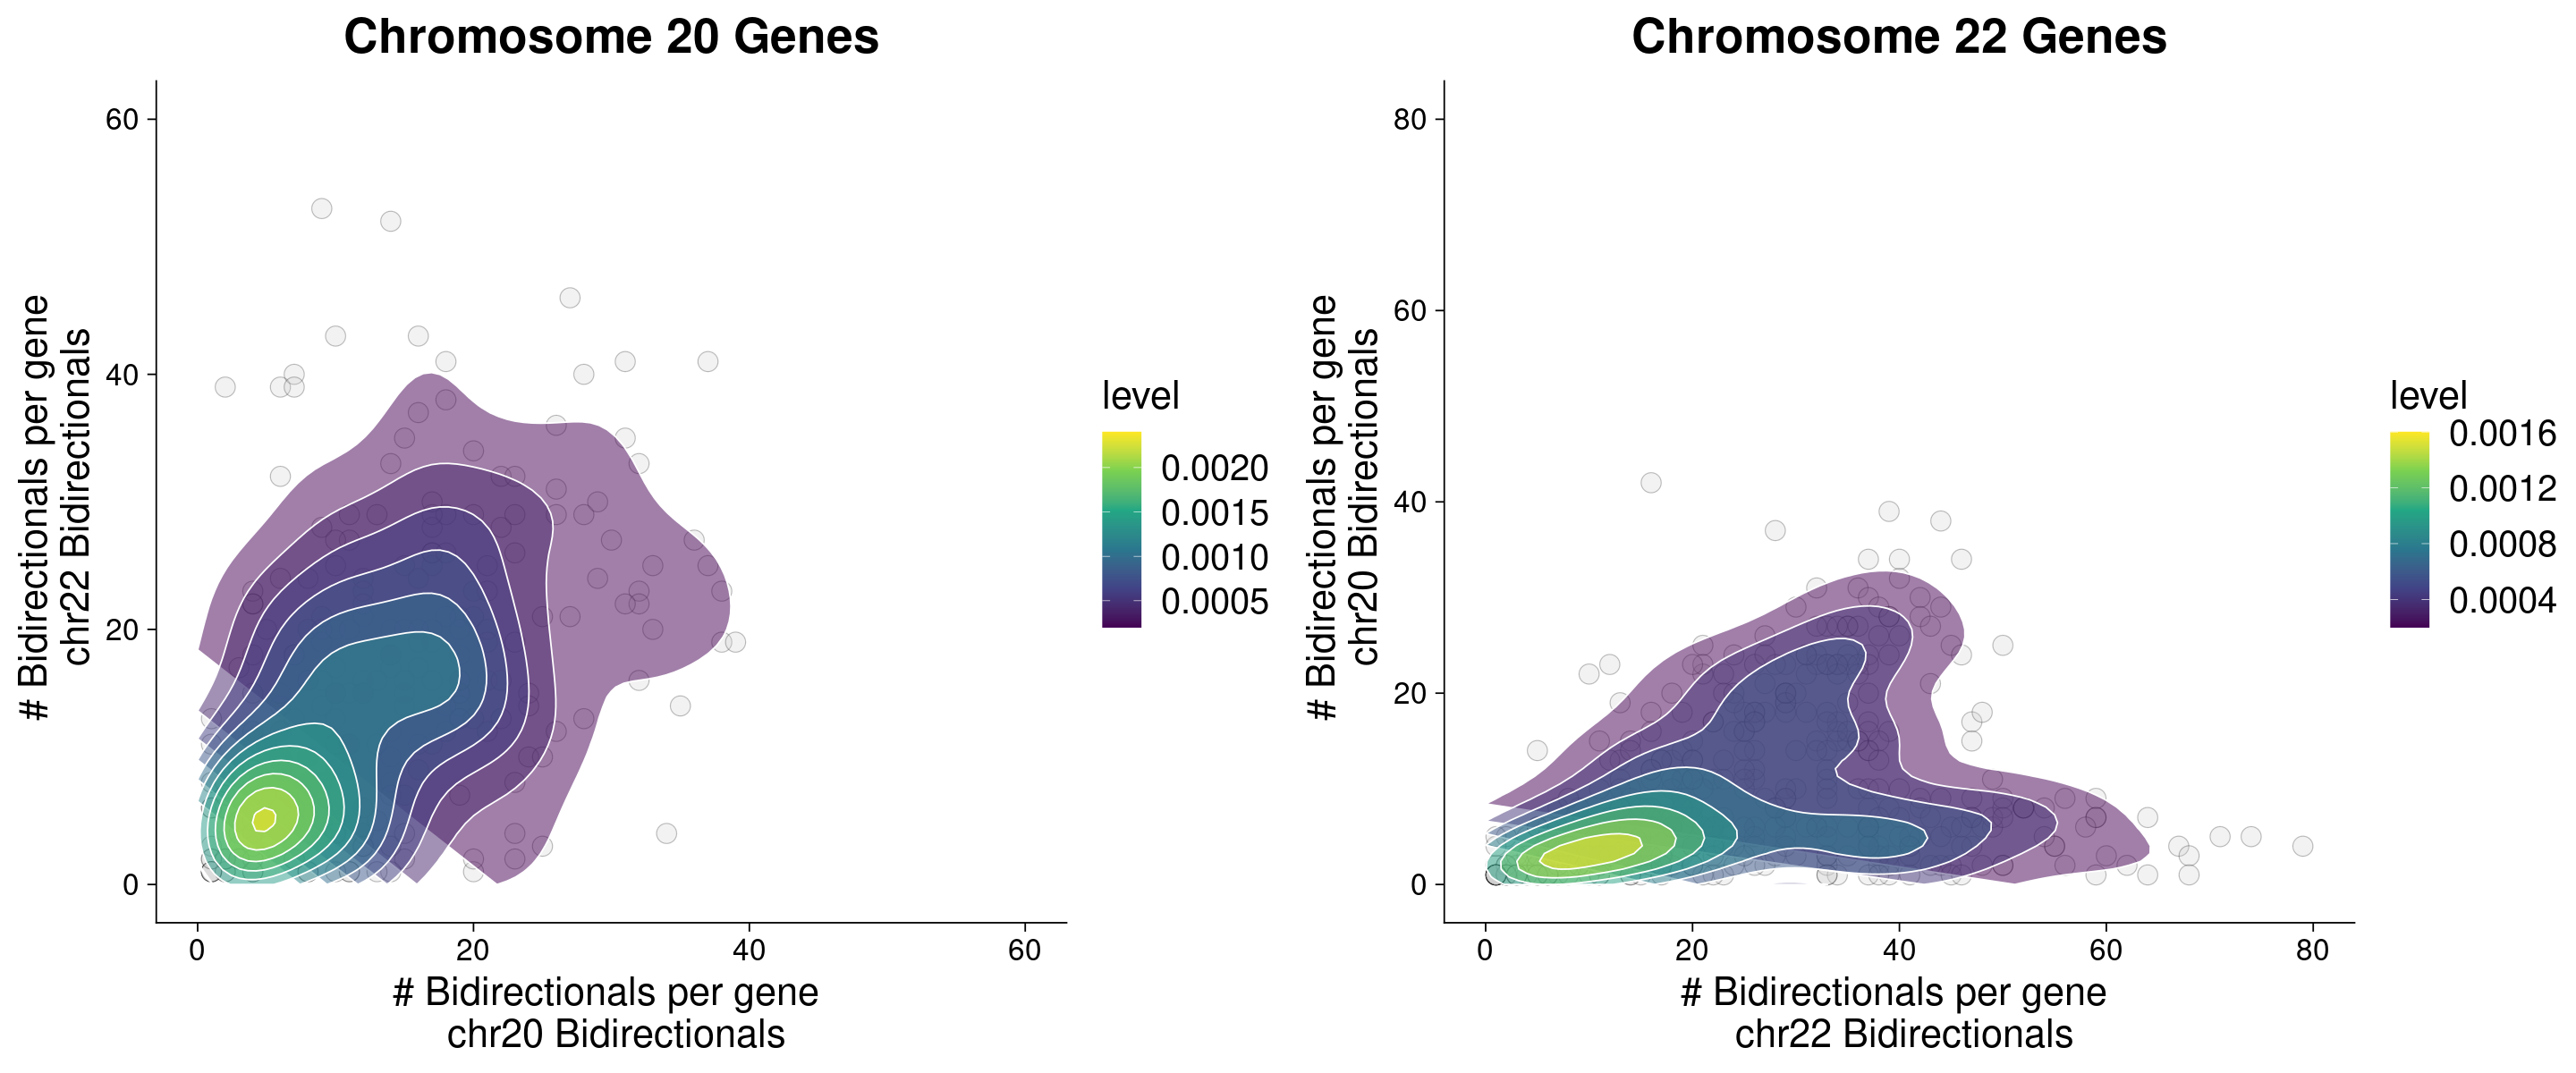

In [52]:
options(repr.plot.width=24, repr.plot.height=10)
bidir_per_gene2 <- cowplot::plot_grid(num_bidirs_chr20_plot2,
                                     num_bidirs_chr22_plot2, ncol=2)
bidir_per_gene2

In [53]:
nrow(num_bidirs_per_gene_chr22_2)

[1] 420

In [54]:
nrow(num_bidirs_per_gene_chr20_2)

[1] 264

`geom_smooth()` using formula 'y ~ x'



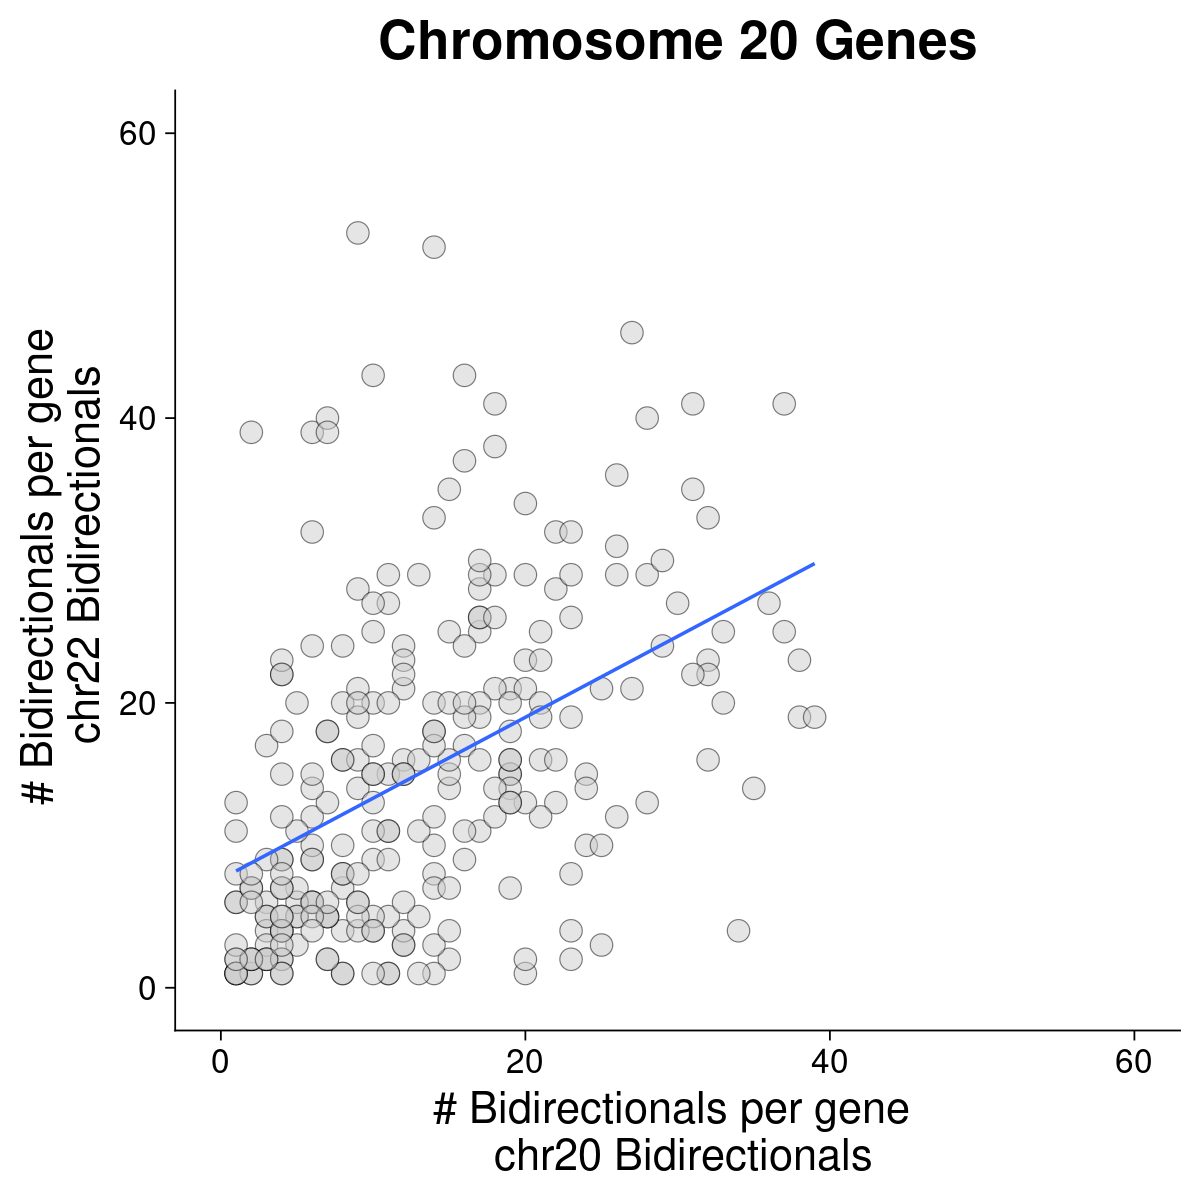

In [55]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr20_plot2b <- ggplot(num_bidirs_per_gene_chr20,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.5) + 
geom_smooth(method = "lm", se = FALSE) +
scale_fill_manual(values=c("#69b3a2", "#404080")) +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("# Bidirectionals per gene \n chr20 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr22 Bidirectionals") +
labs(fill=" ") +
xlim(0,60) +
ylim(0,60) +
#geom_hline(yintercept=15,linetype=2) +
#geom_vline(xintercept=15,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr20_plot2b

`geom_smooth()` using formula 'y ~ x'



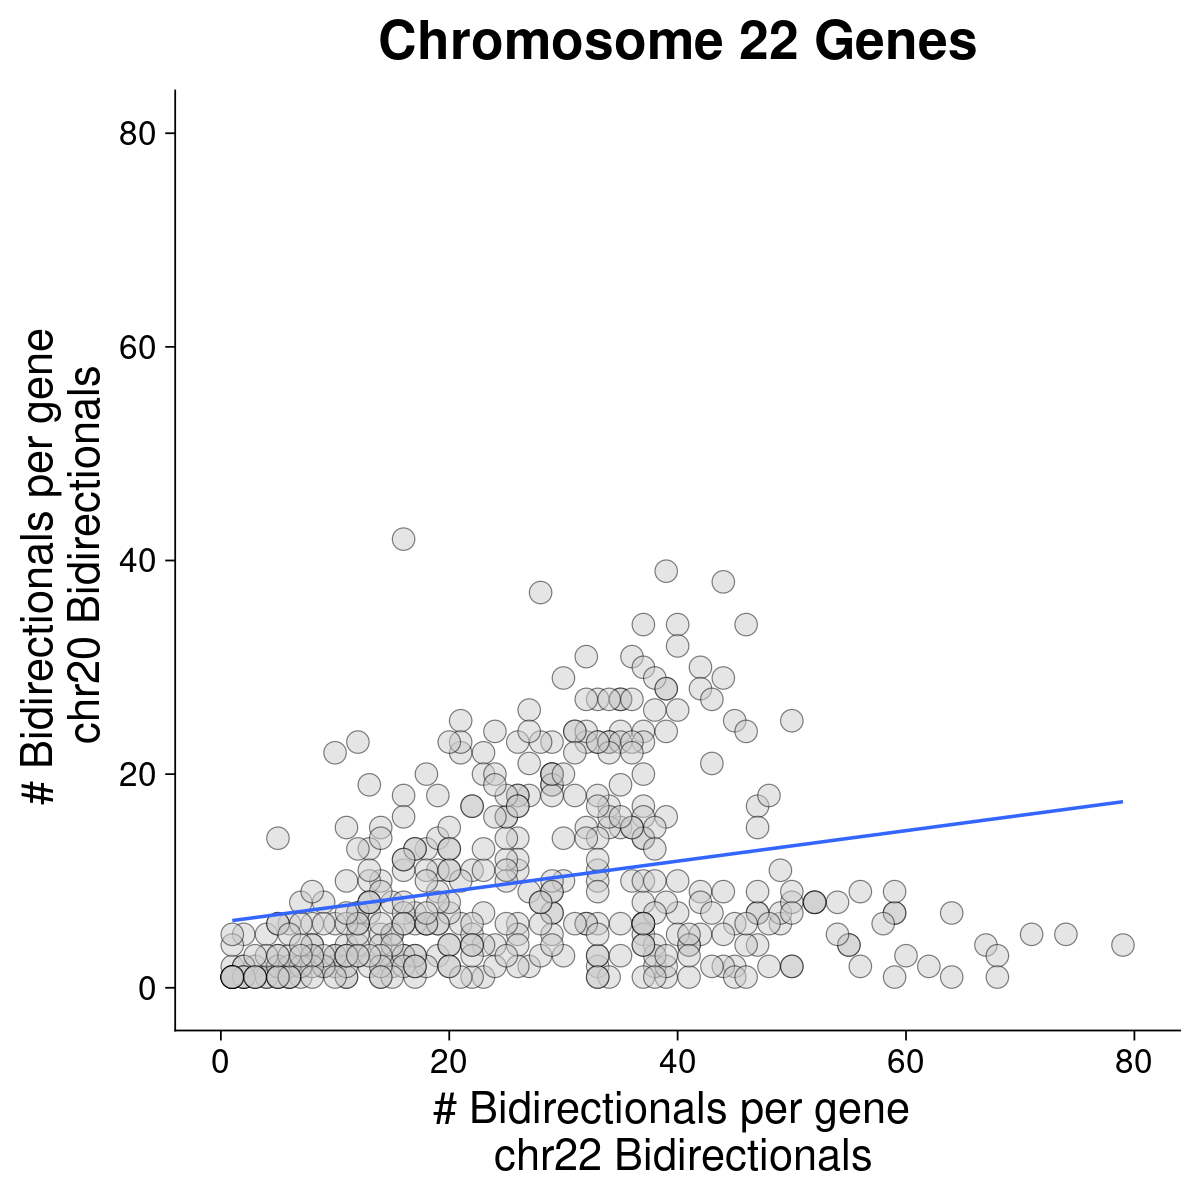

In [56]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr22_plot2b <- ggplot(num_bidirs_per_gene_chr22_2,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.5) + 
scale_fill_manual(values=c("#69b3a2", "#404080")) +
geom_smooth(method = "lm", se = FALSE) +
theme_cowplot(24) + 
ggtitle("Chromosome 22 Genes") +
xlab("# Bidirectionals per gene \n chr22 Bidirectionals") +
ylab("# Bidirectionals per gene \n chr20 Bidirectionals") +
labs(fill=" ") +
xlim(0,80) +
ylim(0,80) +
#geom_hline(yintercept=25,linetype=2) +
#geom_vline(xintercept=25,linetype=2) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) 

num_bidirs_chr22_plot2b

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



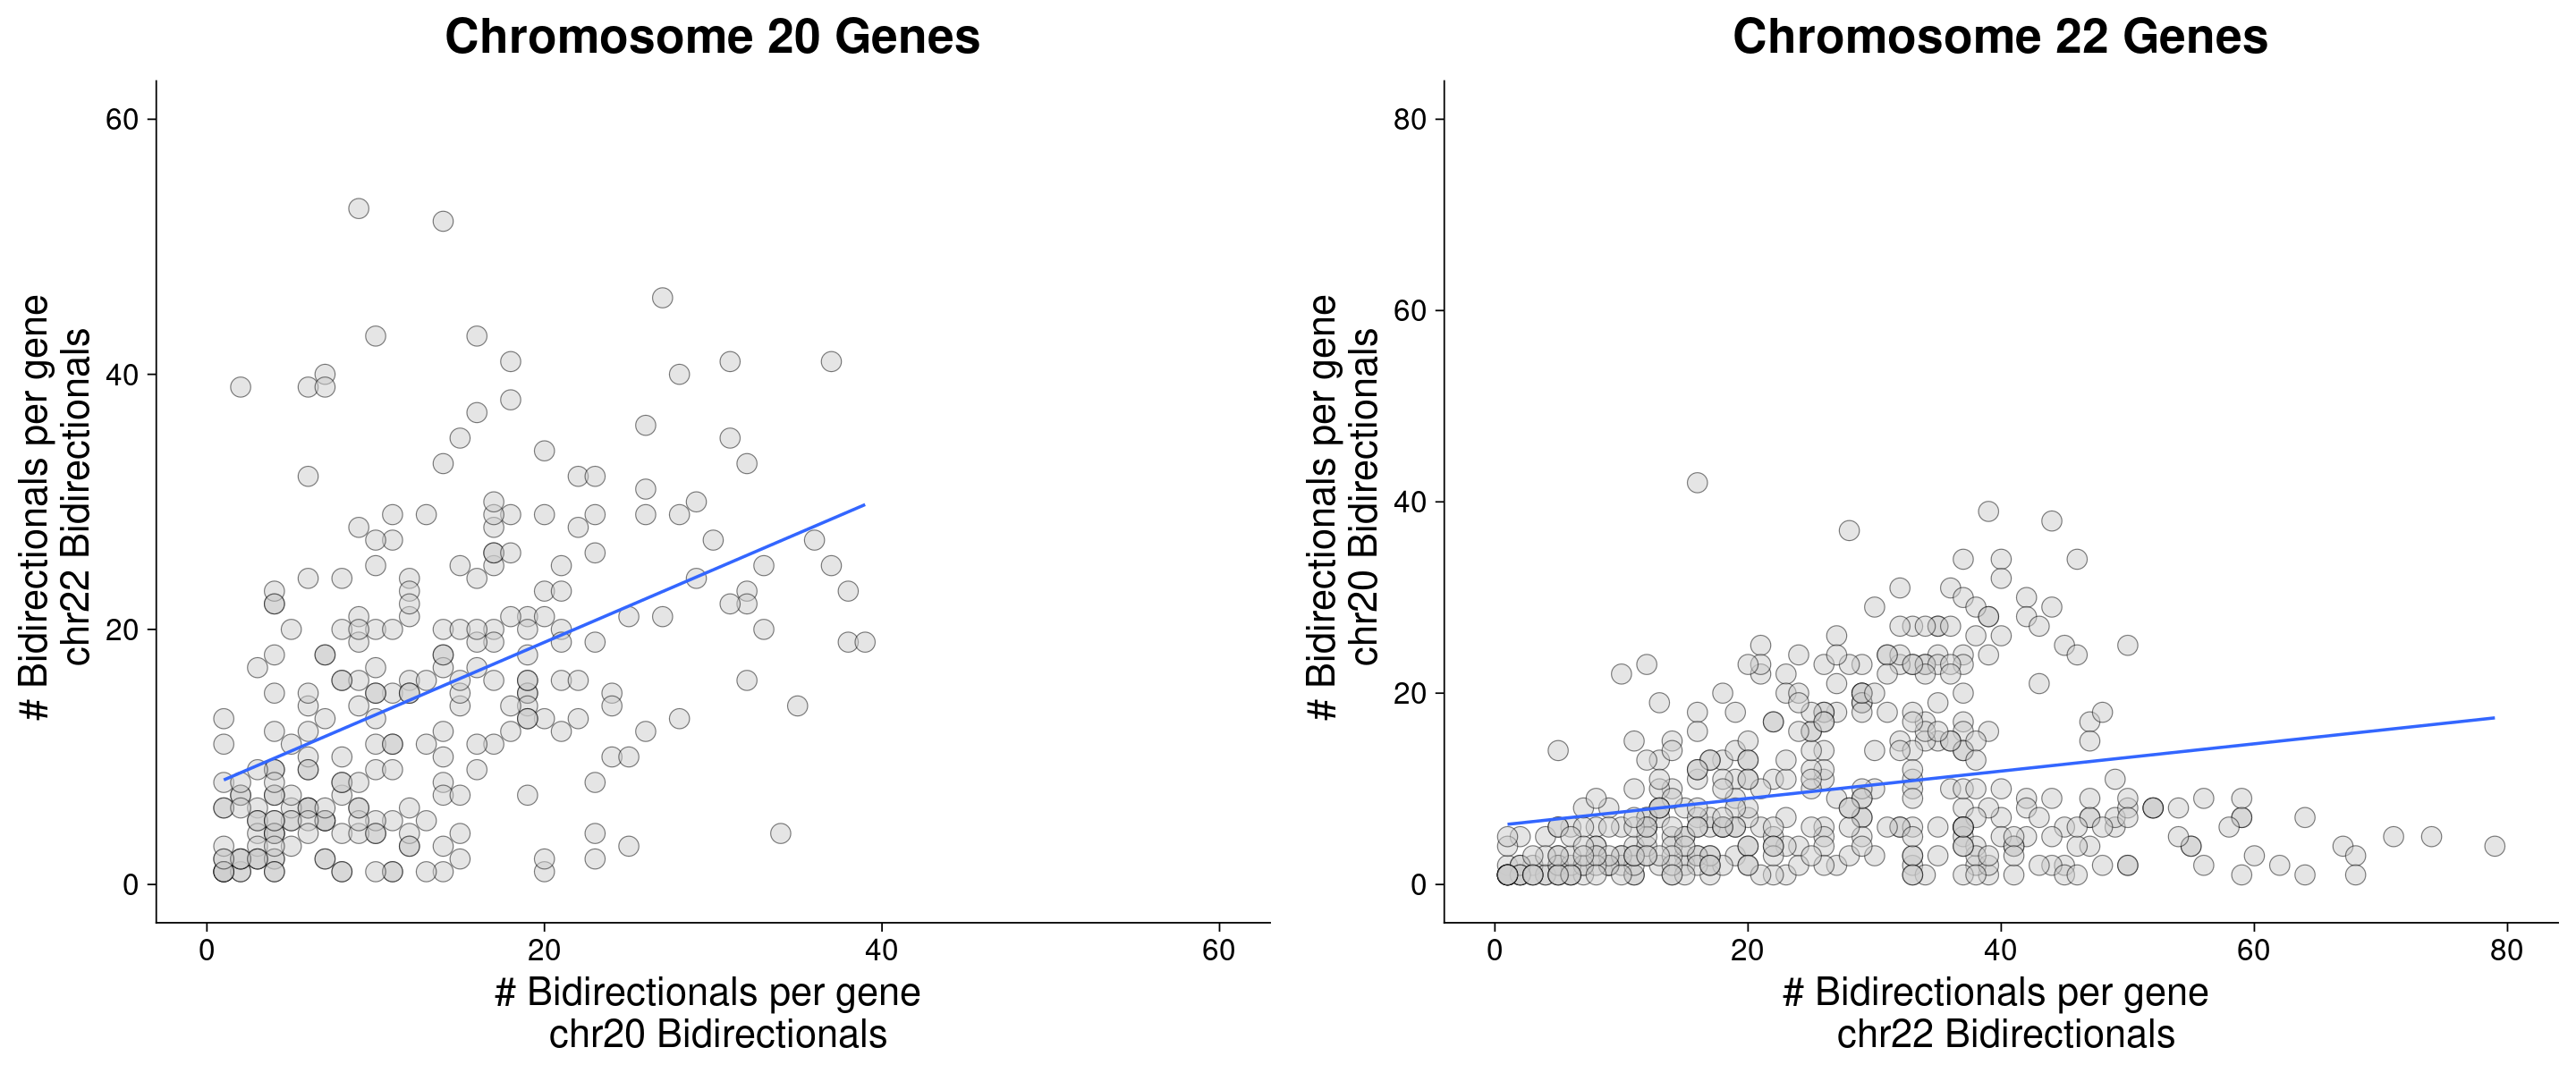

In [57]:
options(repr.plot.width=24, repr.plot.height=10)
bidir_per_gene3 <- cowplot::plot_grid(num_bidirs_chr20_plot2b,
                                     num_bidirs_chr22_plot2b, ncol=2)
bidir_per_gene3

`geom_smooth()` using formula 'y ~ x'



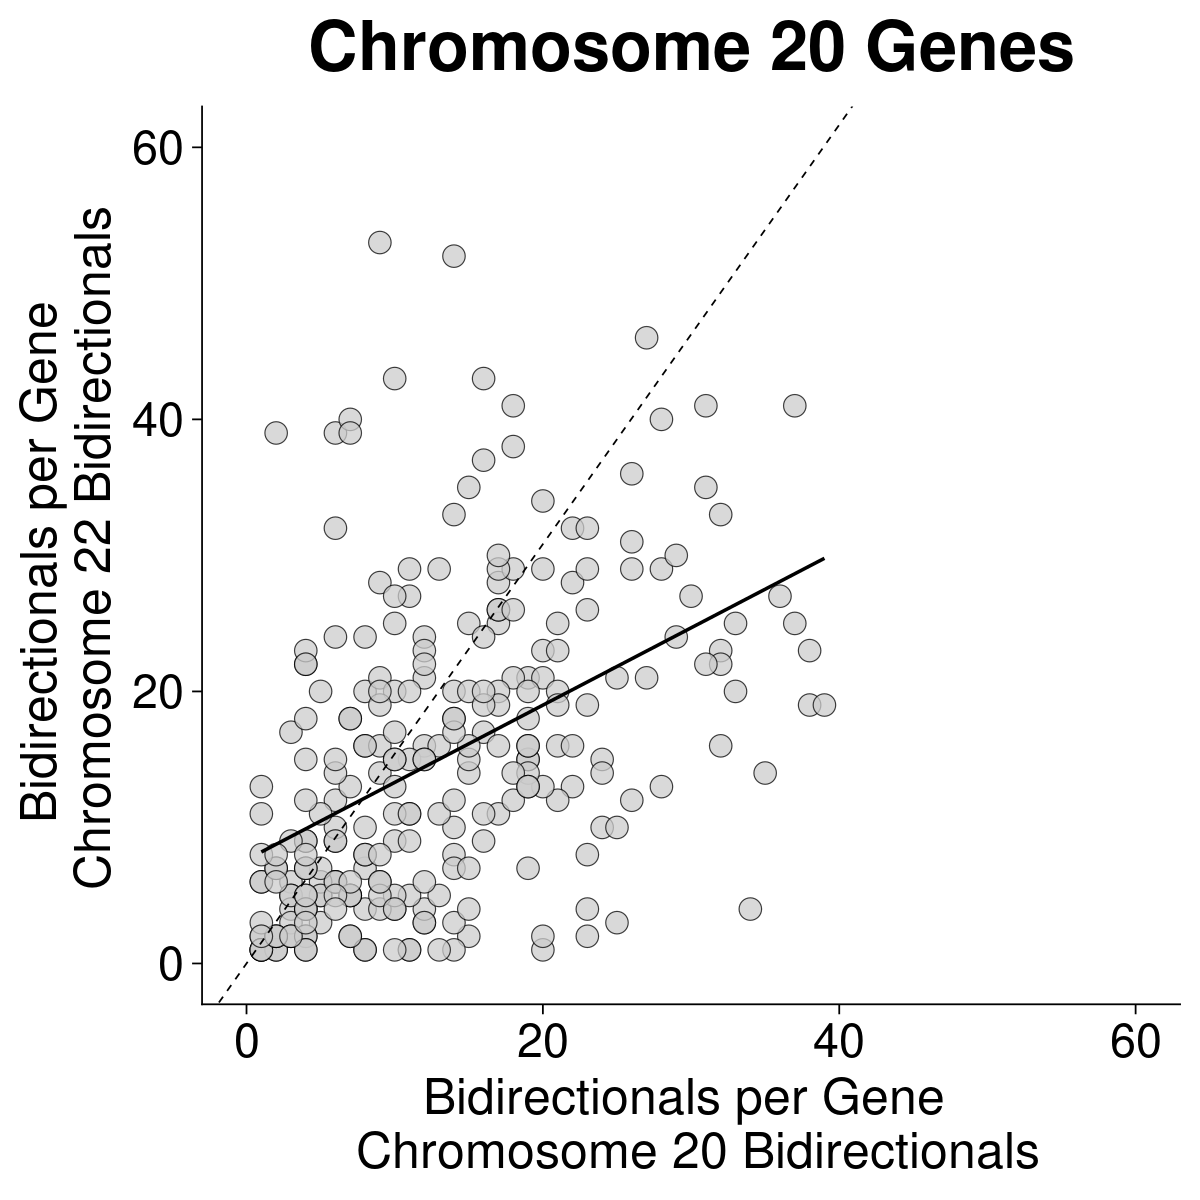

In [79]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr20_plot2c <- ggplot(num_bidirs_per_gene_chr20,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.75) + 
geom_smooth(method = "lm", se = FALSE, color = 'black') +
geom_abline(intercept = 0, slope=(7169/4651), linetype='dashed') +
theme_cowplot(24) + 
ggtitle("Chromosome 20 Genes") +
xlab("Bidirectionals per Gene \n Chromosome 20 Bidirectionals") +
ylab("Bidirectionals per Gene \n Chromosome 22 Bidirectionals") +
labs(fill=" ") +
xlim(0,60) +
ylim(0,60) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 36), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 28)) 

num_bidirs_chr20_plot2c

`geom_smooth()` using formula 'y ~ x'



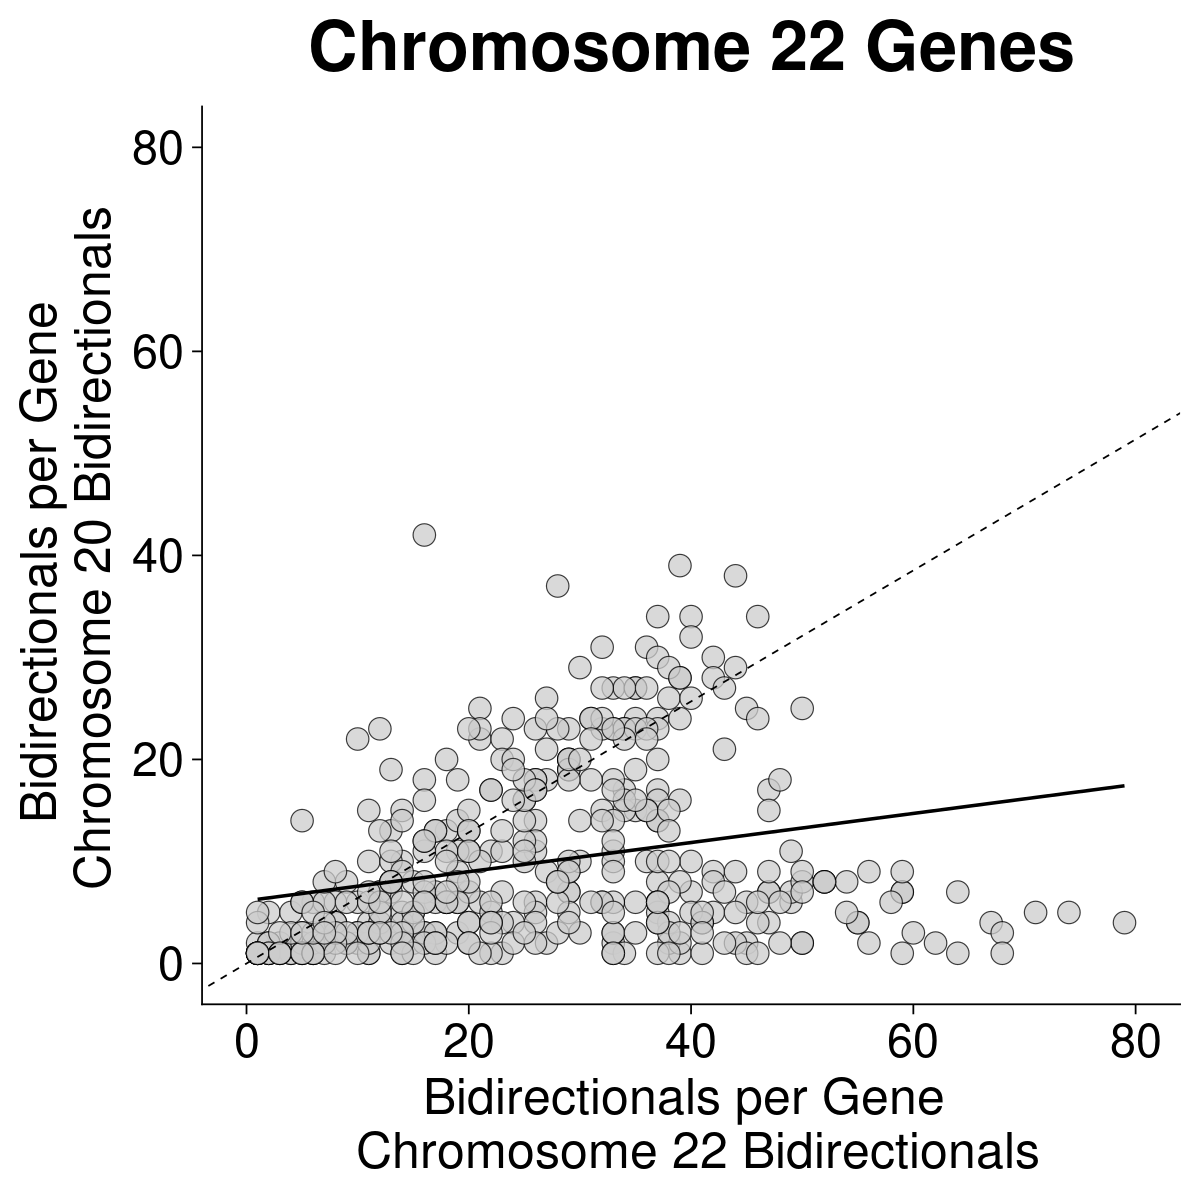

In [80]:
options(repr.plot.width=10, repr.plot.height=10)

num_bidirs_chr22_plot2c <- ggplot(num_bidirs_per_gene_chr22_2,
                          aes(x=Freq.x, y=Freq.y)) +
geom_point(shape = 21, size=6, fill='gray80', alpha=0.75) + 
geom_abline(intercept = 0, slope=(4519/7037), linetype='dashed', color='black') +
geom_smooth(method = "lm", se = FALSE, color='black') +
theme_cowplot(24) + 
ggtitle("Chromosome 22 Genes") +
xlab("Bidirectionals per Gene \n Chromosome 22 Bidirectionals") +
ylab("Bidirectionals per Gene \n Chromosome 20 Bidirectionals") +
labs(fill=" ") +
xlim(0,80) +
ylim(0,80) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 36), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 28)) 

num_bidirs_chr22_plot2c

In [81]:
ggsave(num_bidirs_chr20_plot2c, width = 10, height = 10,
       filename = '/Users/rusi2317/projects/DBNascent_Analysis/figures/num_bidirs_chr20_swapped_scatter.pdf',
       bg = "transparent")

`geom_smooth()` using formula 'y ~ x'



In [82]:
ggsave(num_bidirs_chr22_plot2c, width = 10, height = 10,
       filename = '/Users/rusi2317/projects/DBNascent_Analysis/figures/num_bidirs_chr22_swapped_scatter.pdf',
       bg = "transparent")

`geom_smooth()` using formula 'y ~ x'



# Session Information

In [83]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggsignif_0.6.3     scales_1.2.1       R.utils_2.12.0     R.oo_1.25.0       
 [5] R.methodsS3_1.8.2  data.table_1.14.2  tidyr_1.2.1        dplyr_1.0.10      
 [9] RColorBrewer_1.1-3 cowplot_1.1.1      ggplot2_3.3.6     

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7      tidyselect_1.1.2  repr_1.1.4        purrr_0.